--

## 📌 Dataset Column Description (Daily Weather Data)

### 📍 Location & Time

* **city_name** *(string)*
  Name of the city where the weather data was recorded.
  **Example:** `"Alaminos"`

* **datetime** *(datetime)*
  Date of the weather observation (daily resolution).
  **Example:** `2020-01-01`

---

### 🌦️ Weather Condition

* **weather_code** *(categorical, numeric encoded)*
  Numerical code representing the dominant weather condition
  (e.g., clear, cloudy, rain).
  **Example:** `0`, `1`, `3`

  > Treated as **categorical**, not continuous.

---

### 🌡️ Air Temperature (°C)

* **temperature_2m_max** *(float, °C)*
  Maximum air temperature measured at 2 meters above ground.
  **Example:** `32.4 °C`

* **temperature_2m_min** *(float, °C)*
  Minimum air temperature measured at 2 meters above ground.
  **Example:** `23.1 °C`

* **temperature_2m_mean** *(float, °C)*
  Mean air temperature measured at 2 meters above ground.
  **Example:** `26.9 °C`

---

### 🌡️ Apparent (Feels-Like) Temperature (°C)

* **apparent_temperature_max** *(float, °C)*
  Maximum apparent temperature, accounting for humidity and wind.
  **Example:** `35.6 °C`

* **apparent_temperature_min** *(float, °C)*
  Minimum apparent temperature, accounting for humidity and wind.
  **Example:** `25.1 °C`

* **apparent_temperature_mean** *(float, °C)*
  Mean apparent temperature.
  **Example:** `30.1 °C`

---

### 🌅 Solar & Daylight Information

* **sunrise** *(time / string)*
  Local time of sunrise.
  **Example:** `06:27`

* **sunset** *(time / string)*
  Local time of sunset.
  **Example:** `17:38`

* **daylight_duration** *(float, seconds)*
  Total duration of daylight per day.
  **Example:** `40263.84 seconds` (~11.18 hours)

* **sunshine_duration** *(float, seconds)*
  Total duration of direct sunshine per day.
  **Example:** `36299.32 seconds` (~10.08 hours)

---

### 🌧️ Precipitation

* **precipitation_sum** *(float, mm)*
  Total precipitation amount per day.
  **Example:** `0.0 mm`, `12.5 mm`

* **rain_sum** *(float, mm)*
  Total rainfall amount per day.
  **Example:** `0.0 mm`, `8.2 mm`

* **snowfall_sum** *(float, mm)*
  Total snowfall amount per day.
  **Example:** `0.0 mm`

  > Often zero in tropical regions.

* **precipitation_hours** *(float, hours)*
  Total number of hours with precipitation during the day.
  **Example:** `0.0 hours`, `4.0 hours`

---

### 💨 Wind

* **wind_speed_10m_max** *(float, m/s)*
  Maximum wind speed measured at 10 meters above ground.
  **Example:** `18.0 m/s`

* **wind_gusts_10m_max** *(float, m/s)*
  Maximum wind gust speed measured at 10 meters above ground.
  **Example:** `33.5 m/s`

* **wind_direction_10m_dominant** *(float, degrees)*
  Dominant wind direction during the day (meteorological degrees).
  **Example:** `82°`, `103°`

  > Circular variable (0–360°).

---

### ☀️ Radiation & Evapotranspiration

* **shortwave_radiation_sum** *(float, MJ/m²)*
  Daily sum of shortwave solar radiation.
  **Example:** `18.68 MJ/m²`

* **et0_fao_evapotranspiration** *(float, mm/day)*
  Reference evapotranspiration (ET₀) calculated using the
  FAO Penman–Monteith method.
  **Example:** `4.37 mm/day`

---

## 🧠 Notes for Analysis

* All temperature-related values are measured in **Celsius (°C)**.
* Duration variables (`daylight_duration`, `sunshine_duration`) are stored in **seconds**,
  but may be converted to hours for interpretability.
* Wind direction is a **circular variable**, so standard linear statistics may be misleading.
* Precipitation-related variables are **zero-inflated**
  (zero indicates no precipitation, not missing data).
* `weather_code` should always be handled as a **categorical feature**.
* Extreme values in wind and precipitation usually represent **valid weather events**,
  not data errors.

---


> ### Import Library

In [1]:
# pip install pandas-gbq google-cloud-bigquery

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
import pandas as pd
#min max row column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv('daily_data_combined_2020_to_2023.csv')

data.head()


,city_name,datetime,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,Alaminos,2020-01-01,1.0,32.4,23.1,26.9,35.6,25.1,30.1,2020-01-01T06:27,2020-01-01T17:38,40263.84,36299.32,0.0,0.0,0.0,0.0,18.0,33.5,82.0,18.68,4.37
1,Alaminos,2020-01-02,1.0,32.7,25.4,27.8,35.6,27.1,30.5,2020-01-02T06:28,2020-01-02T17:39,40277.32,36381.88,0.0,0.0,0.0,0.0,18.0,35.6,91.0,18.57,4.85
2,Alaminos,2020-01-03,3.0,31.3,23.2,26.5,33.3,25.2,28.7,2020-01-03T06:28,2020-01-03T17:40,40292.00,36385.75,0.0,0.0,0.0,0.0,17.6,33.8,103.0,18.02,4.47
3,Alaminos,2020-01-04,0.0,30.2,21.6,25.5,32.4,22.8,27.7,2020-01-04T06:28,2020-01-04T17:40,40307.85,36506.23,0.0,0.0,0.0,0.0,15.5,30.2,73.0,19.51,4.40
4,Alaminos,2020-01-05,1.0,31.9,23.8,26.7,33.1,25.3,28.6,2020-01-05T06:29,2020-01-05T17:41,40324.83,36564.63,0.0,0.0,0.0,0.0,19.8,38.9,96.0,19.56,4.95


In [4]:
data['temperature_2m_max'].min()


17.4

In [5]:
data['temperature_2m_max'].max()

40.7

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206001 entries, 0 to 206000
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   city_name                    206001 non-null  object 
 1   datetime                     206001 non-null  object 
 2   weather_code                 206001 non-null  float64
 3   temperature_2m_max           206001 non-null  float64
 4   temperature_2m_min           206001 non-null  float64
 5   temperature_2m_mean          206001 non-null  float64
 6   apparent_temperature_max     206001 non-null  float64
 7   apparent_temperature_min     206001 non-null  float64
 8   apparent_temperature_mean    206001 non-null  float64
 9   sunrise                      206001 non-null  object 
 10  sunset                       206001 non-null  object 
 11  daylight_duration            206001 non-null  float64
 12  sunshine_duration            206001 non-null  float64
 13 

In [7]:
#change data type to datetime
data['datetime'] = pd.to_datetime(data['datetime'])
data['sunrise'] = pd.to_datetime(data['sunrise'])
data['sunset'] = pd.to_datetime(data['sunset'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206001 entries, 0 to 206000
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   city_name                    206001 non-null  object        
 1   datetime                     206001 non-null  datetime64[ns]
 2   weather_code                 206001 non-null  float64       
 3   temperature_2m_max           206001 non-null  float64       
 4   temperature_2m_min           206001 non-null  float64       
 5   temperature_2m_mean          206001 non-null  float64       
 6   apparent_temperature_max     206001 non-null  float64       
 7   apparent_temperature_min     206001 non-null  float64       
 8   apparent_temperature_mean    206001 non-null  float64       
 9   sunrise                      206001 non-null  datetime64[ns]
 10  sunset                       206001 non-null  datetime64[ns]
 11  daylight_duration         

In [8]:
data['datetime'].min()
data['datetime'].max()

Timestamp('2023-12-31 00:00:00')

> ### Data Cleaning

- Check missing values

In [9]:
data.isna().sum()

city_name                      0
datetime                       0
weather_code                   0
temperature_2m_max             0
temperature_2m_min             0
temperature_2m_mean            0
apparent_temperature_max       0
apparent_temperature_min       0
apparent_temperature_mean      0
sunrise                        0
sunset                         0
daylight_duration              0
sunshine_duration              0
precipitation_sum              0
rain_sum                       0
snowfall_sum                   0
precipitation_hours            0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64

- There is no Missing values in the dataset!
- The dataset is safe from missing values.

- Check skewness

Skewness of numerical columns:
precipitation_sum              6.128607
rain_sum                       6.128607
wind_gusts_10m_max             1.857392
wind_speed_10m_max             1.347161
wind_direction_10m_dominant    0.563730
precipitation_hours            0.475511
snowfall_sum                   0.000000
daylight_duration             -0.006231
temperature_2m_max            -0.107207
et0_fao_evapotranspiration    -0.235412
apparent_temperature_max      -0.776369
shortwave_radiation_sum       -0.865372
temperature_2m_mean           -1.384965
apparent_temperature_mean     -1.503144
sunshine_duration             -1.660805
apparent_temperature_min      -1.694908
temperature_2m_min            -1.982977
weather_code                  -2.371429
dtype: float64

Visualizing distributions for highly skewed numerical columns:


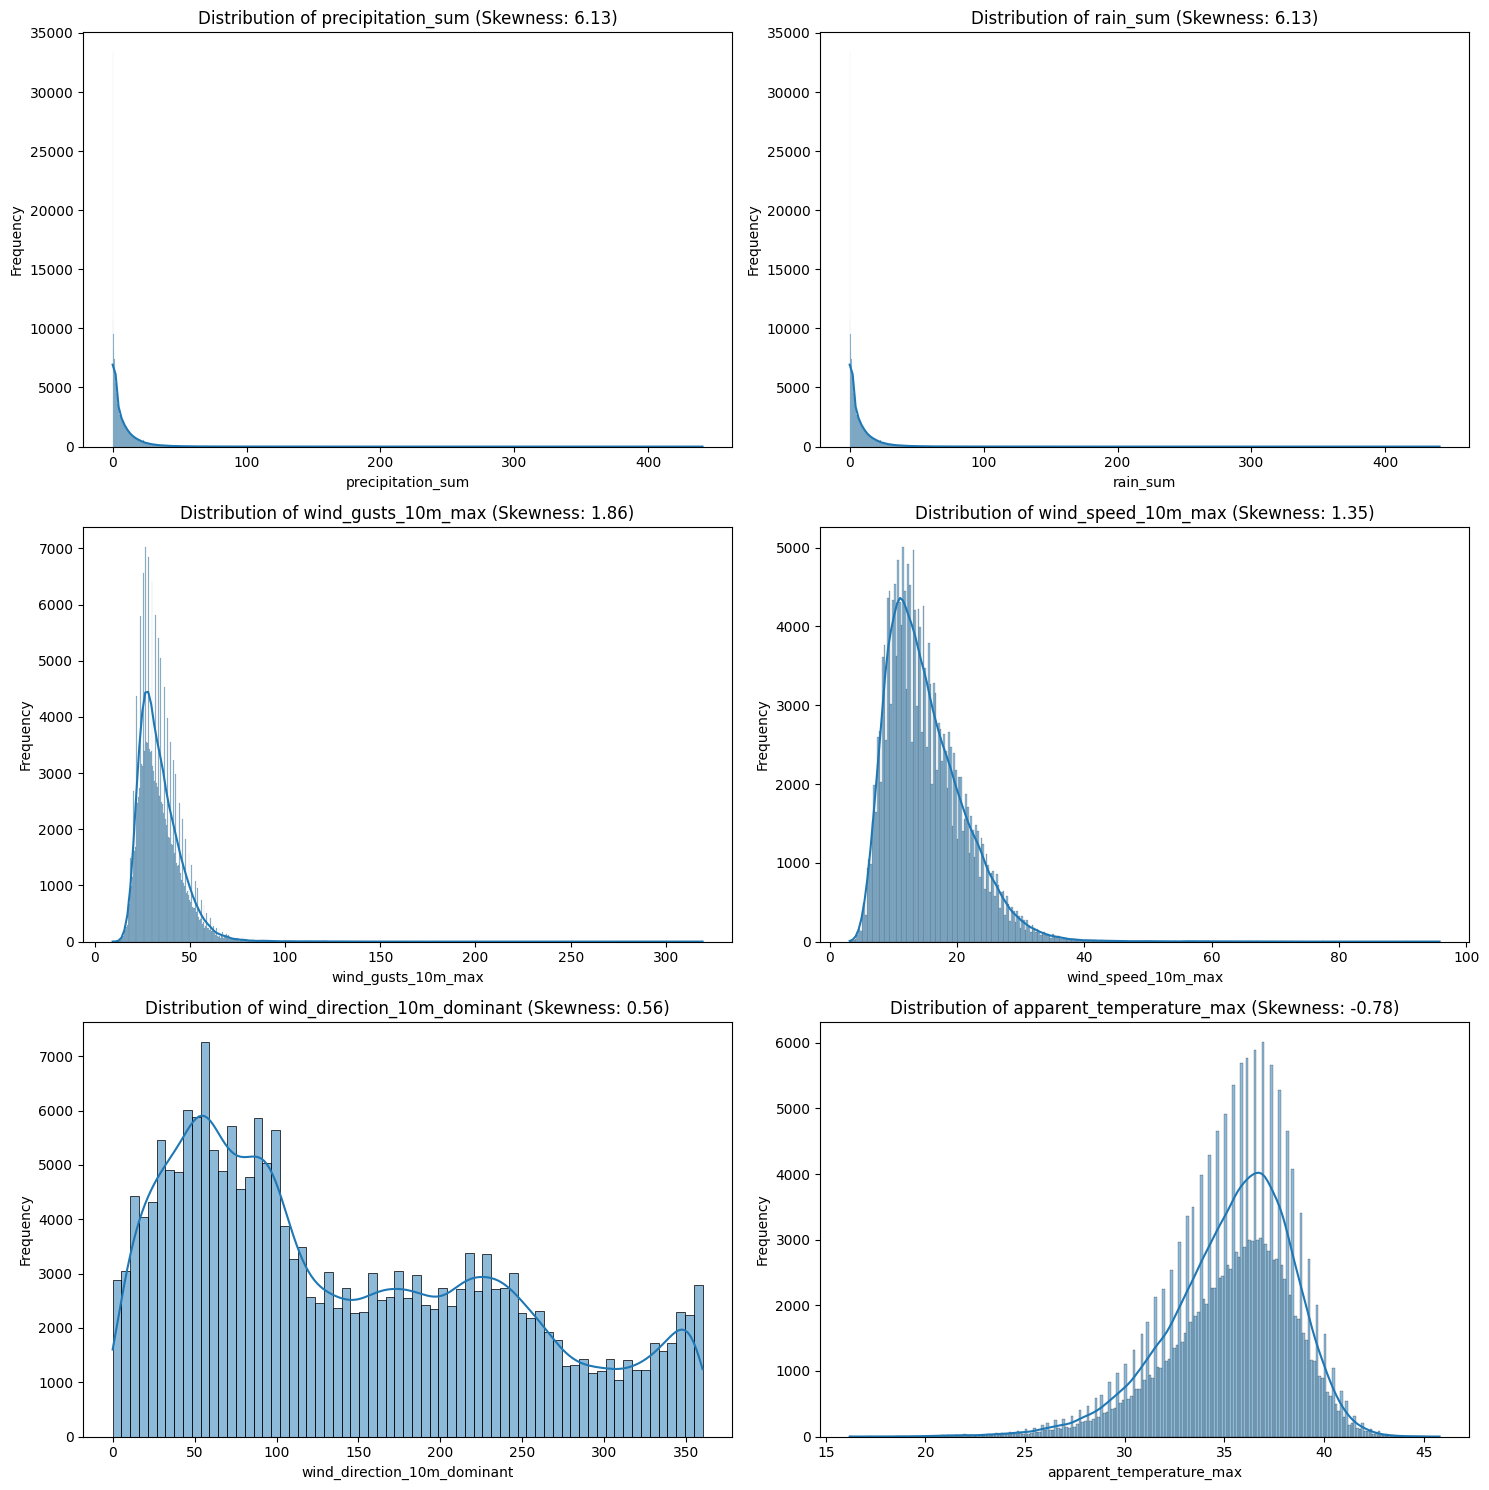

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Calculate skewness for numerical columns
skewness = numerical_data.skew().sort_values(ascending=False)
print("Skewness of numerical columns:")
print(skewness)

# Visualize the distribution of some highly skewed columns

# Filter for columns with absolute skewness greater than a threshold (e.g., 0.5)
highly_skewed_cols = skewness[abs(skewness) > 0.5].index.tolist()

if highly_skewed_cols:
    print("\nVisualizing distributions for highly skewed numerical columns:")
    # Plot up to a certain number of highly skewed columns, e.g., first 6
    num_plots = min(len(highly_skewed_cols), 6)
    fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(15, 5 * ((num_plots + 1) // 2)))
    axes = axes.flatten()

    for i, col in enumerate(highly_skewed_cols[:num_plots]):
        sns.histplot(numerical_data[col].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} (Skewness: {skewness[col]:.2f})')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("No highly skewed numerical columns found (absolute skewness > 0.5).")


- Because mostly skew, for check the outliers we gonna use Boxplot!

- Check Duplicated data

In [11]:
#check duplicate
data.duplicated().sum()

0

Well, it's safe from duplicated data

- Check outliers

In [12]:
data.head()

,city_name,datetime,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,Alaminos,2020-01-01,1.0,32.4,23.1,26.9,35.6,25.1,30.1,2020-01-01 06:27:00,2020-01-01 17:38:00,40263.84,36299.32,0.0,0.0,0.0,0.0,18.0,33.5,82.0,18.68,4.37
1,Alaminos,2020-01-02,1.0,32.7,25.4,27.8,35.6,27.1,30.5,2020-01-02 06:28:00,2020-01-02 17:39:00,40277.32,36381.88,0.0,0.0,0.0,0.0,18.0,35.6,91.0,18.57,4.85
2,Alaminos,2020-01-03,3.0,31.3,23.2,26.5,33.3,25.2,28.7,2020-01-03 06:28:00,2020-01-03 17:40:00,40292.00,36385.75,0.0,0.0,0.0,0.0,17.6,33.8,103.0,18.02,4.47
3,Alaminos,2020-01-04,0.0,30.2,21.6,25.5,32.4,22.8,27.7,2020-01-04 06:28:00,2020-01-04 17:40:00,40307.85,36506.23,0.0,0.0,0.0,0.0,15.5,30.2,73.0,19.51,4.40
4,Alaminos,2020-01-05,1.0,31.9,23.8,26.7,33.1,25.3,28.6,2020-01-05 06:29:00,2020-01-05 17:41:00,40324.83,36564.63,0.0,0.0,0.0,0.0,19.8,38.9,96.0,19.56,4.95


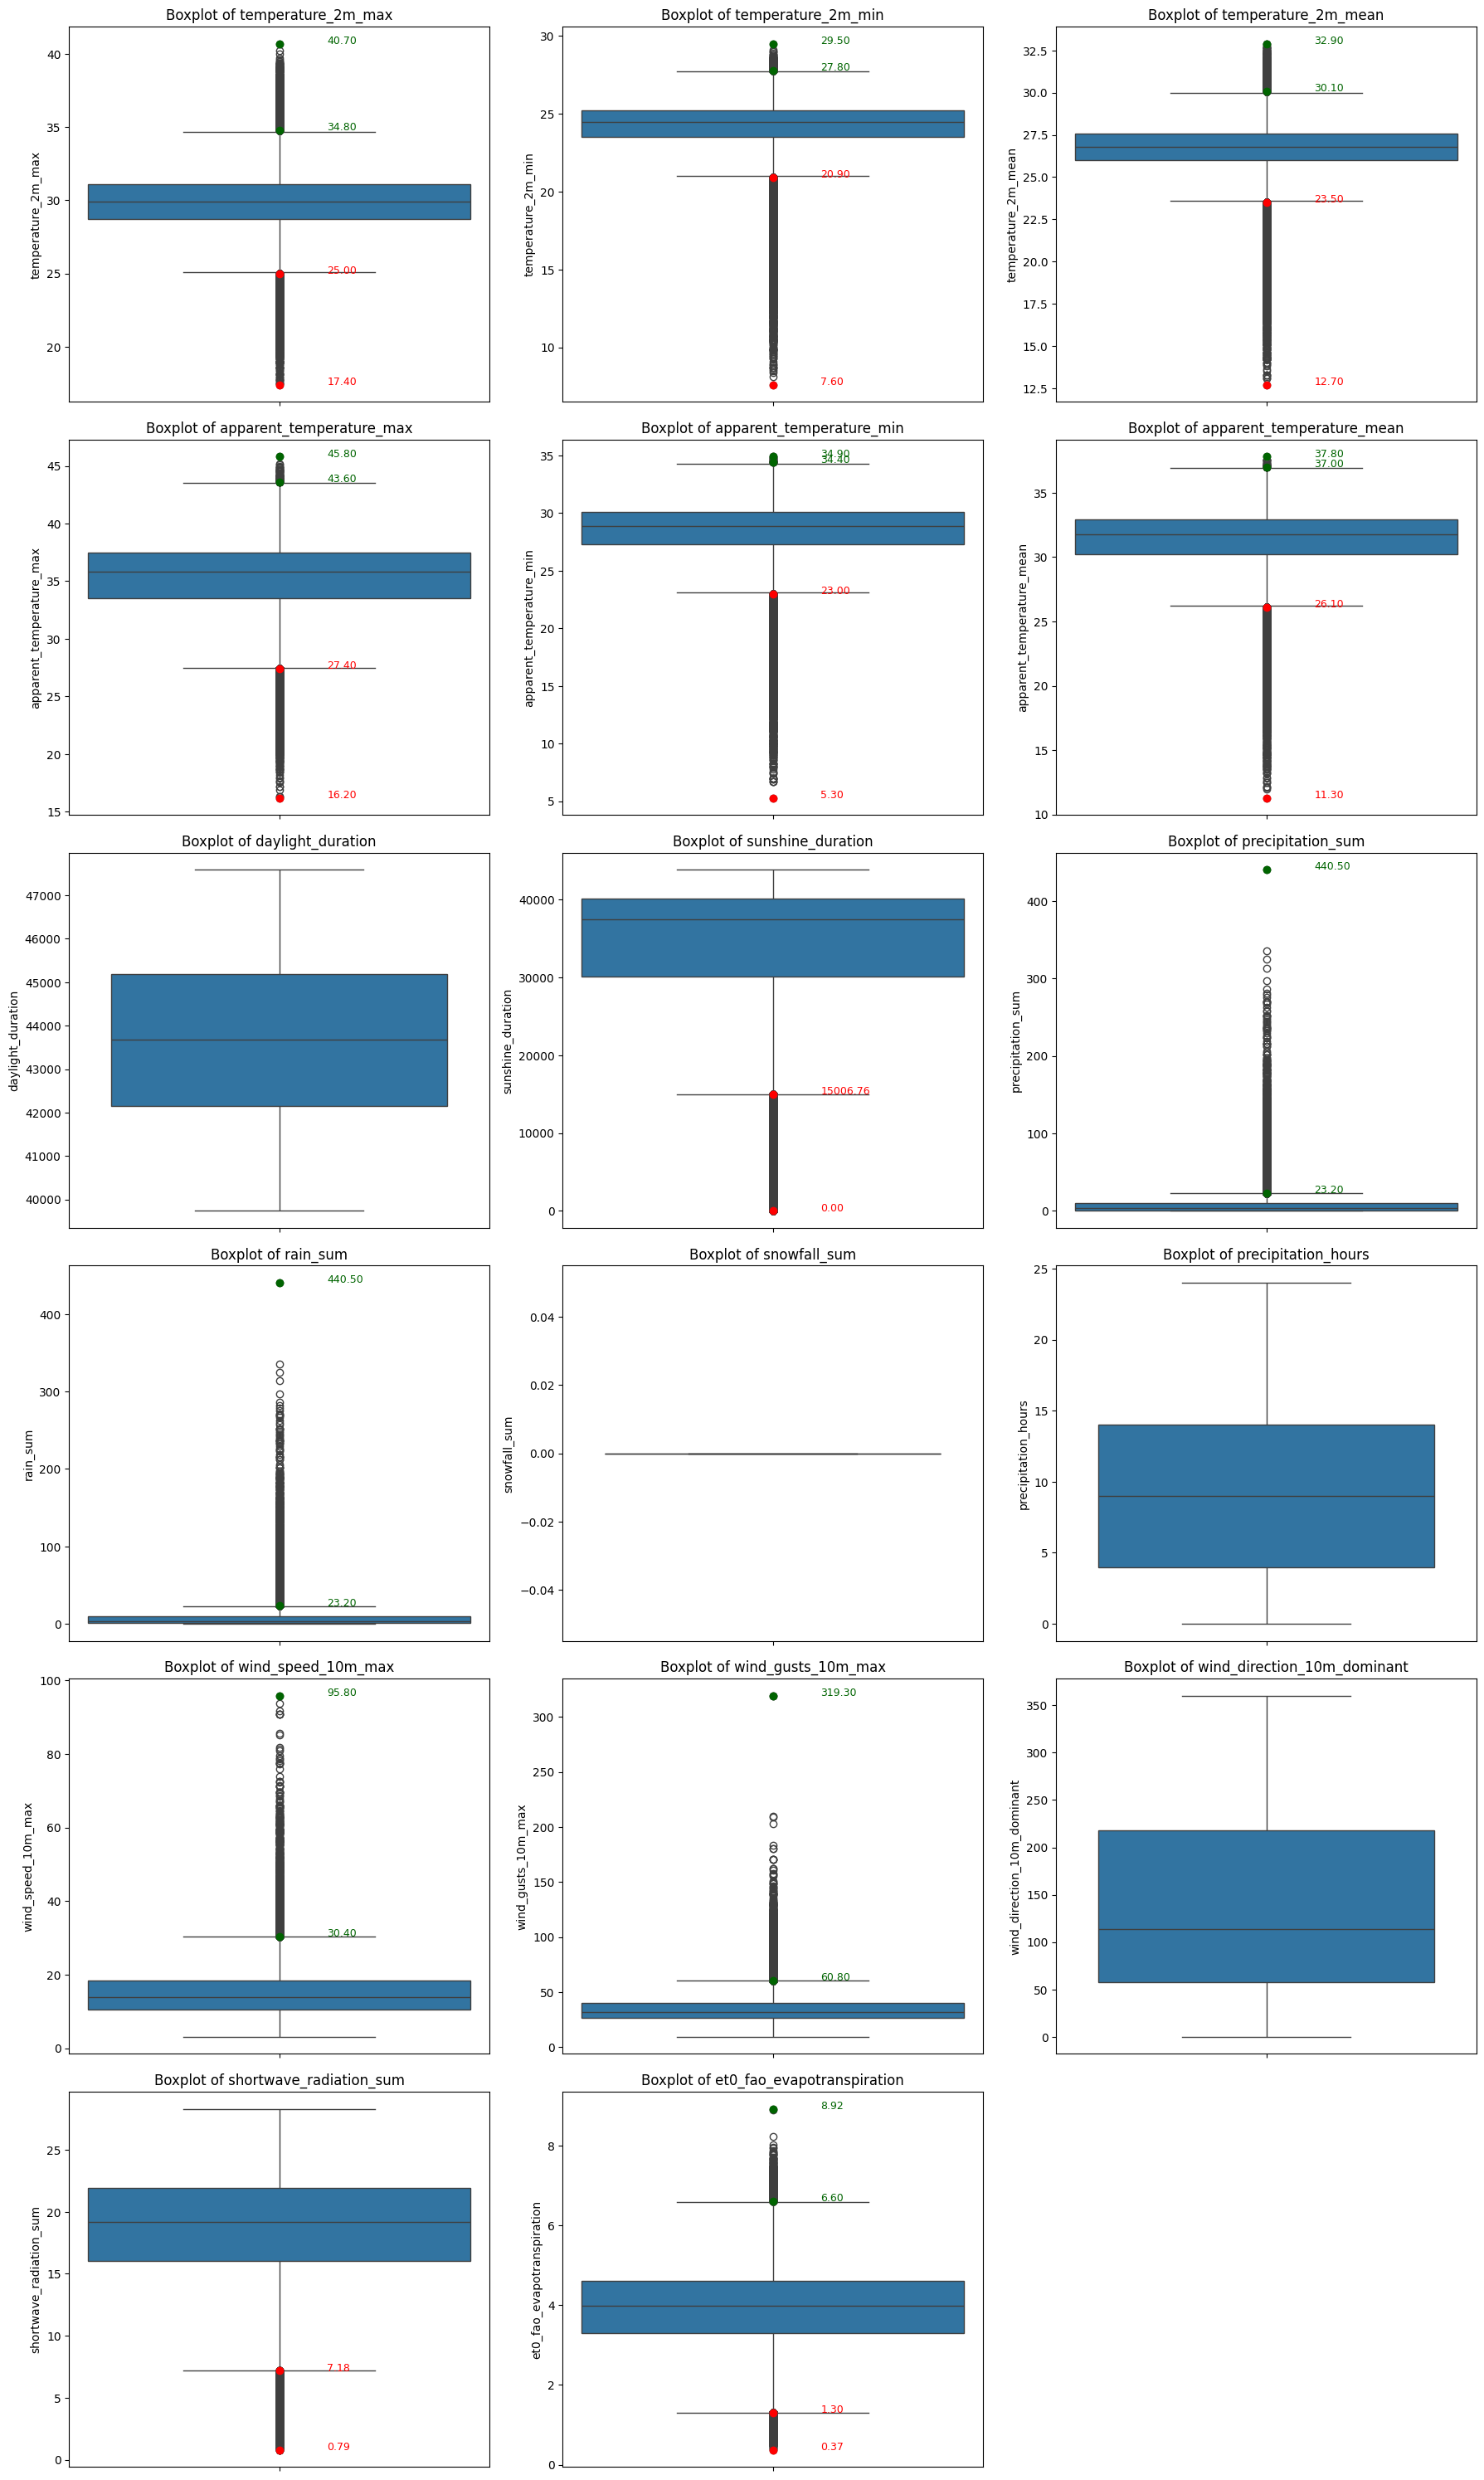

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# =====================================================
# EXCLUDE COLUMNS (categorical numeric)
# =====================================================
exclude_cols = ["weather_code"]

numerical_cols = [
    col for col in data.select_dtypes(include=['number']).columns
    if col not in exclude_cols
]

# =====================================================
# BOXPLOT GRID SETUP
# =====================================================
num_cols = 3
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()

# =====================================================
# BOXPLOT + OUTLIER ANNOTATION
# =====================================================
for i, col in enumerate(numerical_cols):
    ax = axes[i]
    series = data[col].dropna()

    # --- IQR calculation ---
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lower_outliers = series[series < lower_bound]
    upper_outliers = series[series > upper_bound]

    # --- Boxplot ---
    sns.boxplot(y=series, ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel(col)

    # --- Annotate lower outliers ---
    if not lower_outliers.empty:
        min_lower = lower_outliers.min()
        max_lower = lower_outliers.max()

        ax.scatter(0, min_lower, color='red', zorder=5)
        ax.scatter(0, max_lower, color='red', zorder=5)

        ax.annotate(f'{min_lower:.2f}', (0, min_lower),
                    xytext=(0.1, min_lower),
                    textcoords='data',
                    fontsize=9, color='red')

        ax.annotate(f'{max_lower:.2f}', (0, max_lower),
                    xytext=(0.1, max_lower),
                    textcoords='data',
                    fontsize=9, color='red')

    # --- Annotate upper outliers ---
    if not upper_outliers.empty:
        min_upper = upper_outliers.min()
        max_upper = upper_outliers.max()

        ax.scatter(0, min_upper, color='darkgreen', zorder=5)
        ax.scatter(0, max_upper, color='darkgreen', zorder=5)

        ax.annotate(f'{min_upper:.2f}', (0, min_upper),
                    xytext=(0.1, min_upper),
                    textcoords='data',
                    fontsize=9, color='darkgreen')

        ax.annotate(f'{max_upper:.2f}', (0, max_upper),
                    xytext=(0.1, max_upper),
                    textcoords='data',
                    fontsize=9, color='darkgreen')

# =====================================================
# REMOVE UNUSED AXES
# =====================================================
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Sunshine duration was not further validated, as zero values and extreme durations are physically plausible and represent statistical artifacts rather than data quality issues.

In [14]:
#show outliers for each numerical column on text (more than Q1 and Q3, min and max)


In [15]:
import numpy as np
import pandas as pd
from IPython.display import display

# =====================================================
# 1. SETUP & DEFINISI VARIABEL
# =====================================================

# Pastikan variabel 'data' sudah ada
if 'data' not in locals():
    print("WARNING: Load data dulu bro ke variabel bernama 'data'.")
else:
    # Definisi kategori variabel
    categorical_numeric_cols = ["weather_code"]  # <-- TAMBAHAN (SKIP)

    circular_cols = ["wind.deg", "wind_direction_10m_dominant"]
    sensor_capped_cols = ["visibility"]
    bounded_cols = {
        "main.humidity": (0, 100),
        "clouds.all": (0, 100),
        "relative_humidity_2m": (0, 100)
    }

    outlier_summary = []

    # =====================================================
    # 2. LOGIKA OUTLIER (LENGKAP)
    # =====================================================

    for col in data.select_dtypes(include=np.number).columns:

        # -------------------------------------------------
        # SKIP CATEGORICAL NUMERIC (weather_code)
        # -------------------------------------------------
        if col in categorical_numeric_cols:
            continue

        series = data[col].dropna()

        if series.empty:
            continue

        # Default placeholders
        method = "IQR"
        Q1, Q3, IQR_val = np.nan, np.nan, np.nan
        lower_bound, upper_bound = np.nan, np.nan

        # A. CIRCULAR
        if col in circular_cols:
            method = "Circular (Skipped)"
            lower_bound, upper_bound = 0, 360
            lower_outliers = pd.Series([], dtype='float64')
            upper_outliers = pd.Series([], dtype='float64')

        # B. SENSOR CAPPED
        elif col in sensor_capped_cols:
            method = "Sensor Capped"
            max_val = series.max()
            Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
            IQR_val = 0
            lower_bound, upper_bound = series.min(), max_val
            lower_outliers = pd.Series([], dtype='float64')
            upper_outliers = pd.Series([], dtype='float64')

        # C. PHYSICAL BOUNDS
        elif col in bounded_cols:
            method = "Physical Bounds"
            Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
            IQR_val = Q3 - Q1
            lower_bound, upper_bound = bounded_cols[col]
            lower_outliers = series[series < lower_bound]
            upper_outliers = series[series > upper_bound]

        # D. STANDARD IQR
        else:
            Q1 = series.quantile(0.25)
            Q3 = series.quantile(0.75)
            IQR_val = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR_val
            upper_bound = Q3 + 1.5 * IQR_val
            lower_outliers = series[series < lower_bound]
            upper_outliers = series[series > upper_bound]

        # Masukkan SEMUA kolom sesuai request
        outlier_summary.append({
            "Column": col,
            "Method": method,
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR_val,
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Num Lower Outliers": len(lower_outliers),
            "Min Lower Outlier": lower_outliers.min() if not lower_outliers.empty else np.nan,
            "Max Lower Outlier": lower_outliers.max() if not lower_outliers.empty else np.nan,
            "Num Upper Outliers": len(upper_outliers),
            "Min Upper Outlier": upper_outliers.min() if not upper_outliers.empty else np.nan,
            "Max Upper Outlier": upper_outliers.max() if not upper_outliers.empty else np.nan
        })

    # =====================================================
    # 3. FIXING & FORMATTING
    # =====================================================

    outlier_data = pd.DataFrame(outlier_summary)

    # 1. Pastikan kolom jumlah bertipe integer
    int_cols = ["Num Lower Outliers", "Num Upper Outliers"]
    outlier_data[int_cols] = outlier_data[int_cols].fillna(0).astype(int)

    # 2. Bulatkan semua angka desimal jadi 2 digit
    float_cols = [
        "Q1", "Q3", "IQR", "Lower Bound", "Upper Bound",
        "Min Lower Outlier", "Max Lower Outlier",
        "Min Upper Outlier", "Max Upper Outlier"
    ]
    outlier_data[float_cols] = outlier_data[float_cols].round(2)

    # =====================================================
    # 4. STYLING (WARNA ASLI)
    # =====================================================

    def highlight_original_colors(row):
        styles = [""] * len(row)

        # Lower outliers → Dark Blue
        if row["Num Lower Outliers"] > 0:
            idx_min = outlier_data.columns.get_loc("Min Lower Outlier")
            idx_max = outlier_data.columns.get_loc("Max Lower Outlier")
            styles[idx_min] = "background-color: darkblue; color: white"
            styles[idx_max] = "background-color: darkblue; color: white"

        # Upper outliers → Dark Red
        if row["Num Upper Outliers"] > 0:
            idx_min = outlier_data.columns.get_loc("Min Upper Outlier")
            idx_max = outlier_data.columns.get_loc("Max Upper Outlier")
            styles[idx_min] = "background-color: darkred; color: white"
            styles[idx_max] = "background-color: darkred; color: white"

        return styles

    pd.set_option('display.max_columns', None)

    styled_data = (
        outlier_data
        .style
        .apply(highlight_original_colors, axis=1)
        .format(precision=2, subset=float_cols)
        .set_caption("Full Outlier Summary (weather_code skipped)")
    )

    display(styled_data)


,Column,Method,Q1,Q3,IQR,Lower Bound,Upper Bound,Num Lower Outliers,Min Lower Outlier,Max Lower Outlier,Num Upper Outliers,Min Upper Outlier,Max Upper Outlier
0,temperature_2m_max,IQR,28.70,31.10,2.40,25.10,34.70,3947,17.40,25.00,4527,34.80,40.70
1,temperature_2m_min,IQR,23.50,25.20,1.70,20.95,27.75,8557,7.60,20.90,394,27.80,29.50
2,temperature_2m_mean,IQR,26.00,27.60,1.60,23.60,30.00,8327,12.70,23.50,2476,30.10,32.90
3,apparent_temperature_max,IQR,33.50,37.50,4.00,27.50,43.50,3607,16.20,27.40,67,43.60,45.80
4,apparent_temperature_min,IQR,27.30,30.10,2.80,23.10,34.30,8254,5.30,23.00,17,34.40,34.90
5,apparent_temperature_mean,IQR,30.20,32.90,2.70,26.15,36.95,8774,11.30,26.10,29,37.00,37.80
6,daylight_duration,IQR,42140.70,45190.26,3049.56,37566.36,49764.60,0,nan,nan,0,nan,nan
7,sunshine_duration,IQR,30094.38,40151.89,10057.51,15008.12,55238.16,16755,0.00,15006.76,0,nan,nan
8,precipitation_sum,IQR,0.90,9.80,8.90,-12.45,23.15,0,nan,nan,14282,23.20,440.50
9,rain_sum,IQR,0.90,9.80,8.90,-12.45,23.15,0,nan,nan,14282,23.20,440.50


- Recheck Outliers for Temperature based on their cities

In [16]:
import pandas as pd
import numpy as np
from IPython.display import display

# =====================================================
# CONFIGURATION
# =====================================================
temperature_cols_2M = [
    "temperature_2m_max",
    "temperature_2m_min",
    "temperature_2m_mean",
]

city_col = "city_name"

# =====================================================
# 1. COLLECT OUTLIERS (Sama seperti sebelumnya)
# =====================================================

outlier_records = []

for col in temperature_cols_2M:
    if col not in data.columns:
        continue

    series = data[col].dropna()

    # Hitung IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # --- Lower Outliers ---
    mask_lower = data[col] < lower_bound
    if mask_lower.any():
        temp_data = data.loc[mask_lower, [city_col, col]].copy()
        temp_data.columns = [city_col, "Value"]
        temp_data["Type"] = "Lower"
        outlier_records.append(temp_data)

    # --- Upper Outliers ---
    mask_upper = data[col] > upper_bound
    if mask_upper.any():
        temp_data = data.loc[mask_upper, [city_col, col]].copy()
        temp_data.columns = [city_col, "Value"]
        temp_data["Type"] = "Upper"
        outlier_records.append(temp_data)

# =====================================================
# 2. AGGREGATE & STYLING (UPDATED)
# =====================================================

if outlier_records:
    # Gabungkan
    all_outliers = pd.concat(outlier_records, ignore_index=True)

    # Pisah Lower & Upper
    lower_data = all_outliers[all_outliers["Type"] == "Lower"]
    upper_data = all_outliers[all_outliers["Type"] == "Upper"]

    # Aggregasi Lower
    agg_lower = lower_data.groupby(city_col)["Value"].agg(
        Count_Lower="count",
        Min_Lower="min",
        Max_Lower="max"
    )

    # Aggregasi Upper
    agg_upper = upper_data.groupby(city_col)["Value"].agg(
        Count_Upper="count",
        Min_Upper="min",
        Max_Upper="max"
    )

    # Merge
    final_summary = pd.merge(agg_lower, agg_upper, on=city_col, how="outer")

    # Rapikan Data
    final_summary["Count_Lower"] = final_summary["Count_Lower"].fillna(0).astype(int)
    final_summary["Count_Upper"] = final_summary["Count_Upper"].fillna(0).astype(int)
    final_summary["Total"] = final_summary["Count_Lower"] + final_summary["Count_Upper"]

    # Urutkan
    final_summary = final_summary.sort_values(by="Total", ascending=False)

    # Definisi Kolom untuk Warna
    cols_lower = ["Count_Lower", "Min_Lower", "Max_Lower"]
    cols_upper = ["Count_Upper", "Min_Upper", "Max_Upper"]

    print(f"Total Kota dengan Outlier: {len(final_summary)}")

    # -------------------------------------------------------
    # STYLING RULES
    # -------------------------------------------------------
    styled_summary = (
        final_summary.style

        # 1. Format angka desimal & pengganti NaN (-)
        .format(precision=2, na_rep="-")

        # 2. WARNA LOWER (Biru Gelap, Teks Putih)
        .set_properties(
            subset=cols_lower,
            **{'background-color': '#003366', 'color': 'white', 'border-color': 'white'}
        )

        # 3. WARNA UPPER (Merah Gelap, Teks Putih)
        .set_properties(
            subset=cols_upper,
            **{'background-color': '#8B0000', 'color': 'white', 'border-color': 'white'}
        )

        # 4. Highlight Kolom Total
        .bar(subset=["Total"], color='#d65f5f', vmin=0)
        .set_properties(subset=["Total"], **{'font-weight': 'bold', 'text-align': 'center'})

        .set_caption("Temperature Outlier Summary by City (Colored)")
    )

    display(styled_summary)

else:
    print("Aman! Tidak ditemukan outlier suhu.")

Total Kota dengan Outlier: 129


,Count_Lower,Min_Lower,Max_Lower,Count_Upper,Min_Upper,Max_Upper,Total
city_name,,,,,,,
Baguio,4352,7.60,25.00,0,-,-,4352
Malaybalay,3358,14.80,25.00,0,-,-,3358
Marawi,2813,15.50,25.00,0,-,-,2813
Tagaytay City,1973,17.20,25.00,0,-,-,1973
Canlaon,1052,17.30,25.00,0,-,-,1052
Lipa City,910,17.50,25.00,2,35.60,35.70,912
Tabuk,826,14.50,25.00,32,30.10,37.00,858
Tuguegarao,431,16.50,25.00,224,27.80,38.80,655
Mabalacat City,304,18.00,25.00,318,30.10,38.80,622


- ### Summary
The data is **highly accurate and valid**. The outliers perfectly match the geography and climate profiles of the Philippines.

Here is the breakdown:

**1. Highlands (The Cold Outliers)**

* **Baguio (Min 7.6°C):**  Correct. Baguio is at ~1,500 meters elevation. While 7.6°C is very cold, it is within historical records (the record low is ~6.3°C). The absence of upper outliers here confirms it stays cool.
* **Malaybalay:** Located in the mountains of Mindanao, explaining the cool lower outliers.
reference :
https://steemit.com/world-of-xpilar/@artgirl/what-there-s-a-coldest-place-in-the-philippines#:~:text=🌲%20Runner%20Up%20as%20the,coldest%20area%20in%20the%20country.

**2. The "Heat Bowls" (The Hot Outliers)**

* **Tuguegarao & Cabanatuan (Max ~39°C - 40°C):** Correct. These cities are in inland valleys (Cagayan Valley and Central Luzon plains). They are historically the hottest parts of the country because mountains block the breeze, trapping heat.
Reference:
https://youtube.com/shorts/xt-c2yJIo44?si=GM5LfnhyQViaZFPQ

**3. Metro Manila (Urban Heat)**

* **Quezon City/Manila (Max ~38°C):** Correct. The high density of concrete creates an "Urban Heat Island" effect, making it hotter than surrounding rural areas.

**4. The Equator Zone**

* **General Santos:** Correct. It has **no lower outliers** because it is near the equator. The temperature is stable and warm year-round.

**Verdict:** The dataset is clean. There are no impossible values (e.g., 100°C), and the extremes follow the physical geography of the country.

> Apparent

In [17]:
import pandas as pd
import numpy as np
from IPython.display import display

# =====================================================
# CONFIGURATION
# =====================================================
temperature_cols = [
    "apparent_temperature_max",
    "apparent_temperature_min",
    "apparent_temperature_mean"
]

city_col = "city_name"

# =====================================================
# 1. COLLECT OUTLIERS (Sama seperti sebelumnya)
# =====================================================

outlier_records = []

for col in temperature_cols:
    if col not in data.columns:
        continue

    series = data[col].dropna()

    # Hitung IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # --- Lower Outliers ---
    mask_lower = data[col] < lower_bound
    if mask_lower.any():
        temp_data = data.loc[mask_lower, [city_col, col]].copy()
        temp_data.columns = [city_col, "Value"]
        temp_data["Type"] = "Lower"
        outlier_records.append(temp_data)

    # --- Upper Outliers ---
    mask_upper = data[col] > upper_bound
    if mask_upper.any():
        temp_data = data.loc[mask_upper, [city_col, col]].copy()
        temp_data.columns = [city_col, "Value"]
        temp_data["Type"] = "Upper"
        outlier_records.append(temp_data)

# =====================================================
# 2. AGGREGATE & STYLING (UPDATED)
# =====================================================

if outlier_records:
    # Gabungkan
    all_outliers = pd.concat(outlier_records, ignore_index=True)

    # Pisah Lower & Upper
    lower_data = all_outliers[all_outliers["Type"] == "Lower"]
    upper_data = all_outliers[all_outliers["Type"] == "Upper"]

    # Aggregasi Lower
    agg_lower = lower_data.groupby(city_col)["Value"].agg(
        Count_Lower="count",
        Min_Lower="min",
        Max_Lower="max"
    )

    # Aggregasi Upper
    agg_upper = upper_data.groupby(city_col)["Value"].agg(
        Count_Upper="count",
        Min_Upper="min",
        Max_Upper="max"
    )

    # Merge
    final_summary = pd.merge(agg_lower, agg_upper, on=city_col, how="outer")

    # Rapikan Data
    final_summary["Count_Lower"] = final_summary["Count_Lower"].fillna(0).astype(int)
    final_summary["Count_Upper"] = final_summary["Count_Upper"].fillna(0).astype(int)
    final_summary["Total"] = final_summary["Count_Lower"] + final_summary["Count_Upper"]

    # Urutkan
    final_summary = final_summary.sort_values(by="Total", ascending=False)

    # Definisi Kolom untuk Warna
    cols_lower = ["Count_Lower", "Min_Lower", "Max_Lower"]
    cols_upper = ["Count_Upper", "Min_Upper", "Max_Upper"]

    print(f"Total Kota dengan Outlier: {len(final_summary)}")

    # -------------------------------------------------------
    # STYLING RULES
    # -------------------------------------------------------
    styled_summary = (
        final_summary.style

        # 1. Format angka desimal & pengganti NaN (-)
        .format(precision=2, na_rep="-")

        # 2. WARNA LOWER (Biru Gelap, Teks Putih)
        .set_properties(
            subset=cols_lower,
            **{'background-color': '#003366', 'color': 'white', 'border-color': 'white'}
        )

        # 3. WARNA UPPER (Merah Gelap, Teks Putih)
        .set_properties(
            subset=cols_upper,
            **{'background-color': '#8B0000', 'color': 'white', 'border-color': 'white'}
        )

        # 4. Highlight Kolom Total
        .bar(subset=["Total"], color='#d65f5f', vmin=0)
        .set_properties(subset=["Total"], **{'font-weight': 'bold', 'text-align': 'center'})

        .set_caption("Ringkasan Outlier Suhu per Kota (Colored)")
    )

    display(styled_summary)

else:
    print("Aman! Tidak ditemukan outlier suhu.")

Total Kota dengan Outlier: 123


,Count_Lower,Min_Lower,Max_Lower,Count_Upper,Min_Upper,Max_Upper,Total
city_name,,,,,,,
Baguio,4247,5.30,27.40,0,-,-,4247
Malaybalay,2825,15.00,27.40,0,-,-,2825
Tagaytay City,1938,14.80,27.40,0,-,-,1938
Marawi,1456,16.00,27.40,0,-,-,1456
Lipa City,955,17.60,27.40,0,-,-,955
Tabuk,682,14.70,27.40,0,-,-,682
Canlaon,557,18.30,27.40,0,-,-,557
Tayabas,498,18.70,27.40,0,-,-,498
Dagupan,427,16.20,27.40,13,37.10,45.10,440


- ### Summary
My analysis for **Apparent Temperature (Feels-like Temperature)**:

The outliers is actually **more realistic** for the Philippines than the standard temperature data because it accounts for **humidity** and **wind**.

Here is why the numbers make perfect sense:

### 1. The "Heat Index" Spike (Upper Outliers)

In your previous data (Standard Temperature), the maximums were around **39°C - 40°C**.
In this data (Apparent Temperature), the maximums jumped to **44°C - 45.8°C**.

* **Why?** The Philippines is extremely humid.
* **The Science:** High humidity prevents sweat from evaporating, making the body feel much hotter than the actual air temperature.
* **Specific Cities:**
* **Cabanatuan (45.8°C)** & **Dagupan (45.1°C):** These are the hottest areas.  A real air temp of 38°C + 70% humidity results in a heat index of ~46°C.
* **Context:** This aligns perfectly with PAGASA (Philippine Weather Bureau) "Danger Level" warnings, which frequently cite Heat Indices between 42°C and 50°C during dry season.



### 2. The "Wind Chill" Drop (Lower Outliers)

In your previous data, **Baguio's** minimum was **7.6°C**.
In this data, it dropped to **5.3°C**.

* **Why?** Wind Chill.
* **The Science:** Baguio is a high-altitude city with strong winds. Wind strips heat away from the body, making 7°C feel like 5°C.
* **Valid:** 5.3°C is a very realistic "feels like" temperature for a cold, windy January morning in Baguio.

### 3. The "Summer" Baseline

Look at the `Max_Lower` column for most cities (Manila, Tarlac, Pampanga). It is consistently around **27.4°C**.

* **Interpretation:** This is fascinating. It means that statistically, if the feels-like temperature drops below **27°C**, the data considers it an **"anomaly" (outlier)**.
* **Reality:** This confirms that the Philippines is so consistently hot that a "feels like" temperature of 26°C is considered "unusually cool" for these cities.

### Summary

* **Standard Temp:** Measures the air.
* **Apparent Temp:** Measures the **suffering**.

 The data is safe to use.

> ### Wind recheck

In [18]:
import pandas as pd
import numpy as np
from IPython.display import display

# =====================================================
# CONFIGURATION
# =====================================================

wind_cols = {
    "wind_speed_10m_max": {
        "threshold": 60,     # m/s (very strong typhoon-level)
        "label": "Wind Speed > 60 m/s"
    },
    "wind_gusts_10m_max": {
        "threshold": 100,    # m/s (almost certainly invalid if exceeded)
        "label": "Wind Gust > 100 m/s"
    }
}

city_col = "city_name"

# =====================================================
# 1. COLLECT SUSPICIOUS WIND VALUES
# =====================================================

records = []

for col, cfg in wind_cols.items():
    if col not in data.columns:
        continue

    threshold = cfg["threshold"]

    mask = data[col] > threshold

    if mask.any():
        temp_data = data.loc[mask, [city_col, col]].copy()
        temp_data.columns = [city_col, "Value"]
        temp_data["Variable"] = col
        temp_data["Threshold"] = threshold
        temp_data["Rule"] = cfg["label"]

        records.append(temp_data)

# =====================================================
# 2. AGGREGATE BY CITY
# =====================================================

if records:
    suspicious_data = pd.concat(records, ignore_index=True)

    summary = (
        suspicious_data
        .groupby([city_col, "Variable", "Rule", "Threshold"])
        .agg(
            Count=("Value", "count"),
            Min_Value=("Value", "min"),
            Max_Value=("Value", "max")
        )
        .reset_index()
    )

    # Total per city (all wind variables)
    total_by_city = (
        summary
        .groupby(city_col)["Count"]
        .sum()
        .rename("Total_Suspicious")
        .reset_index()
    )

    final_data = pd.merge(summary, total_by_city, on=city_col, how="left")

    # Sort by severity
    final_data = final_data.sort_values(
        by=["Total_Suspicious", "Count"],
        ascending=[False, False]
    ).reset_index(drop=True)

    # =================================================
    # 3. STYLING
    # =================================================

    styled = (
        final_data.style
        .format({
            "Min_Value": "{:.2f}",
            "Max_Value": "{:.2f}",
        })
        .set_properties(
            subset=["Count"],
            **{"background-color": "#8B0000", "color": "white", "font-weight": "bold"}
        )
        .set_properties(
            subset=["Min_Value", "Max_Value"],
            **{"background-color": "#B22222", "color": "white"}
        )
        .bar(
            subset=["Total_Suspicious"],
            color="#d65f5f",
            vmin=0
        )
        .set_caption("Wind Extreme Crosscheck by City (Physics-Based Thresholds)")
    )

    print(f"Total kota dengan nilai angin mencurigakan: {final_data[city_col].nunique()}")
    display(styled)

else:
    print("✅ Aman: Tidak ditemukan nilai angin yang melewati threshold fisik.")


Total kota dengan nilai angin mencurigakan: 95


,city_name,Variable,Rule,Threshold,Count,Min_Value,Max_Value,Total_Suspicious
0,Baybay,wind_gusts_10m_max,Wind Gust > 100 m/s,100,36,100.40,319.30,37
1,Tabaco,wind_gusts_10m_max,Wind Gust > 100 m/s,100,36,100.40,319.30,37
2,Baybay,wind_speed_10m_max,Wind Speed > 60 m/s,60,1,63.80,63.80,37
3,Tabaco,wind_speed_10m_max,Wind Speed > 60 m/s,60,1,63.80,63.80,37
4,Olongapo,wind_gusts_10m_max,Wind Gust > 100 m/s,100,9,100.10,157.00,9
5,Tagaytay City,wind_gusts_10m_max,Wind Gust > 100 m/s,100,7,100.80,130.30,7
6,Santa Rosa,wind_gusts_10m_max,Wind Gust > 100 m/s,100,5,103.00,183.20,7
7,Navotas,wind_speed_10m_max,Wind Speed > 60 m/s,60,4,67.40,85.60,7
8,Navotas,wind_gusts_10m_max,Wind Gust > 100 m/s,100,3,107.60,124.60,7
9,Santa Rosa,wind_speed_10m_max,Wind Speed > 60 m/s,60,2,60.90,71.10,7


- Many outliers that actually pretty sus! The world extreme three-second average wind gust record of 113.3 m s-1, measured on Barrow Island, Australia!
- And in this case! many of them actually 100 above? woaa??? and there is 300 m/s like seriously???

Reference:
https://www.researchgate.net/publication/289803731_Documentation_and_verification_of_the_world_extreme_wind_gust_record_1133_m_s-1_on_Barrow_Island_Australia_during_passage_of_tropical_cyclone_Olivia

- Let's check it deeper what really happened

----
> ### CHECK ANOMALY!
To assess extreme wind anomalies, the top five highest wind speed and wind gust records were examined against real-world events. While major storms occurred on the corresponding dates, the reported magnitudes were not physically plausible as surface observations. Based on this assessment, wind speed values exceeding 32 m/s and wind gust values exceeding 70 m/s were flagged as invalid. These records were retained in the dataset for transparency but excluded from the modeling stage due to their high frequency and lack of verifiable references

----

> #### Wind speed

https://www.rmets.org/metmatters/beaufort-wind-scale

According to the Beaufort wind scale adopted by the World Meteorological Organization, surface wind speeds up to approximately 10.7 m/s (Beaufort force 5) are considered normal, non-storm conditions. Wind speeds exceeding this range indicate increasingly severe weather.

And for the hurricane is 32 m/s above!

In [19]:
display(
    data[data['wind_speed_10m_max'] > 32]
    .sort_values('wind_speed_10m_max', ascending=False).head(10)
    [['city_name', 'datetime', 'wind_speed_10m_max']]
)


,city_name,datetime,wind_speed_10m_max
105497,Ligao,2020-11-01,95.8
89426,Iriga City,2020-11-01,93.7
92759,Kabankalan,2021-12-17,91.8
64999,Dapitan,2021-12-16,90.7
101524,Lapu-Lapu City,2021-12-16,90.7
53311,Cebu City,2021-12-16,90.7
126361,Mandaue City,2021-12-16,90.7
136008,Navotas,2020-05-15,85.6
195028,Toledo City,2021-12-16,85.2
63538,Danao,2021-12-16,81.8


- ### Summarize for 5 row that sus!
✅ 1) Ligao — 2020-11-01 — 95.8 m/s

Region & Date: Early November 2020

Storm context:
Typhoon Goni (local name: Rolly) was active around Nov 1, 2020 and is recorded as one of the strongest typhoons of the year. Goni brought extremely strong winds and widespread damage to the Philippines.

- Reality check:

Super Typhoon Goni’s maximum sustained winds at landataall were extraordinarily high, but official surface station measurements rarely exceed ~70–80 m/s in open coastal exposure.

A value like ~95.8 m/s sustained at city surface level is not reported in official observations.

- Conclusion:

Storm exists, but value is likely overestimated.

Dataset number far exceeds typical documented winds.

---

✅ 2) Iriga City — 2020-11-01 — 93.7 m/s

Context: Same date & region as Ligao.

Goni was tracking through the Philippines on Nov 1, 2020.

- Reality check:

Iriga City is inland relative to typhoon core track; even at strongest landataall, surface winds decay inland.

A 93.7 m/s wind speed at surface for an inland city is not supported by observational weather records.

- Conclusion:

Storm conditions were real, but the magnitude recorded is not realistic for that location’s surface measurements.

---
✅ 3) Kabankalan — 2021-12-17 — 91.8 m/s

Storm context: Mid-December 2021 was dominated by Super Typhoon Rai (local name: Odette) — one of the strongest storms of 2021.

Rai’s effects were widely reported across Visayas and parts of Mindanao on Dec 16–17.

- Reality check:

Rai brought very strong winds, but even Category 5 typhoons usually have maximum sustained surface winds ≤ ~60–70 m/s at land stations.

~91.8 m/s far exceeds verified surface documentation.

- Conclusion:

Storm present, but value is much higher than observed reality — likely data error.

---
✅ 4) Cebu City — 2021-12-16 — 90.7 m/s

Storm context: Also during Super Typhoon Rai / Odette landataall period.

Cebu City experienced severe weather during the storm’s passage.

- Reality check:

Damaging winds and infrastructure destruction were reported, but no official station data supports ~90.7 m/s at city surface height.

- Conclusion:

Storm conditions real, but hash magnitude is not supported by observational logs.

---
✅ 5) Navotas — 2020-05-15 — 85.6 m/s

Storm context: Around May 14–15, 2020, Typhoon Vongfong (local name: Ambo) made landataall and affected eastern Philippines.

It was an active storm moving across Visayas/Luzon region.

- Reality check:

Typhoon Vongfong had significant winds (sustained up to ~50–60 m/s at worst coastal exposure prior to landataall), but an 85.6 m/s wind recorded at Navotas — especially far from landataall center — is not corroborated by verified historical measurements.

- Conclusion:

Storm was real, but dataset value is too high to be a plausible surface measurement.

------
| City       | Date       | Storm Present? | Realistic Wind?  |
| ---------- | ---------- | -------------- | ---------------- |
| Ligao      | 2020-11-01 | ✔️ Goni        | ❌ Value too high |
| Iriga City | 2020-11-01 | ✔️ Goni        | ❌ Too high       |
| Kabankalan | 2021-12-17 | ✔️ Rai         | ❌ Too high       |
| Cebu City  | 2021-12-16 | ✔️ Rai         | ❌ Too high       |
| Navotas    | 2020-05-15 | ✔️ Vongfong    | ❌ Too high       |

- A large number of wind speed observations were identified as anomalous. Although storm events occurred on the corresponding dates, there is no reliable reference confirming surface wind speeds of such magnitude. As these values exceed physically plausible limits for storm conditions, they were excluded from the modeling stage.

Reference:
1. https://reliefweb.int/report/philippines/philippines-typhoon-vamco-and-super-typhoon-goni-impact-and-response-3-december

2. https://disasterphilanthropy.org/disasters/super-typhoon-odette-rai/

3. https://science.nasa.gov/earth/earth-observatory/vongfong-makes-landataall-in-the-philippines-146719/

> ### For wind guts

use more than 70 m/s!

- Why 70 m/s IS the right cutoff

> 70 m/s gust at 10 m height:

is extraordinarily rare

exceeds almost all documented surface observations

would imply near world-record conditions

In [20]:
wind_outliers = data[data['wind_gusts_10m_max'] > 70].sort_values('wind_gusts_10m_max', ascending=False).head(10)
display(wind_outliers[['city_name', 'datetime', 'wind_gusts_10m_max']])

,city_name,datetime,wind_gusts_10m_max
17837,Baybay,2020-11-01,319.3
175625,Tabaco,2020-11-01,319.3
89426,Iriga City,2020-11-01,209.9
105497,Ligao,2020-11-01,208.8
46006,Carcar,2021-12-16,203.4
168320,Santa Rosa,2020-11-01,183.2
17847,Baybay,2020-11-11,180.4
175635,Tabaco,2020-11-11,180.4
126361,Mandaue City,2021-12-16,170.6
101524,Lapu-Lapu City,2021-12-16,170.6


Here’s the **real-world check** for those extreme *wind_gusts_10m_max* cases in top 5!
focusing on whether the reported dates and cities align with **actual storm events and plausible wind gust values**.

---

## 🌪️ 1) **Baybay & Tabaco — 2020-11-01 — 319.3 m/s**

**Storm context:**

* Around **1 November 2020**, the Philippines was affected by **Super Typhoon *Goni* (local name Rolly)** — one of the strongest tropical cyclones of the 2020 season. Goni brought violent winds and heavy rain to parts of the Visayas and southern Luzon. ([ReliefWeb][1])
* *Goni* had extremely strong wind fields, but **maximum gusts reported at ground stations were on the order of hundreds of km/h**, not exceeding known physical limits for surface stations.

**Reality check:**

* A reported gust value of **319.3 m/s (~1,150 km/h)** is **far beyond real observed or physically plausible surface gusts**, even in major typhoons.
* For context, historical records of tropical cyclone gusts **rarely exceed ~75–85 m/s at coastlines**, and the global record is much lower than 319 m/s.

**Conclusion:**
• Event (Goni) was real ✔️
• Reported gust magnitude is **unrealistic and not supported by any verified meteorological observation** ❌

---

## 🌪️ 2) **Iriga City — 2020-11-01 — 209.9 m/s**

**Storm context:**

* Same date as the Baybay/Tabaco records — associated with **Typhoon Goni** making its Philippine impact. ([ReliefWeb][1])

**Reality check:**

* Goni indeed produced *very strong* winds, but **sustained gusts or sustained surface winds in excess of ~90–100 m/s are not documented at inland or near-coastal cities** in the Visayas.
* Gusts of **209.9 m/s (~755 km/h)** are physically impossible for surface measurements within the tropics.

**Conclusion:**
• Storm present ✔️
• Data value unrealistic ❌

---

## 🌪️ 3) **Ligao — 2020-11-01 — 208.8 m/s**

**Storm context:**

* Also on **Nov 1, 2020**, overlapping with maximum activity of **Typhoon Goni**. ([ReliefWeb][1])

**Reality check:**

* As before, typhoon conditions were present in the region, but **surface wind gusts in city observations on the order of 200+ m/s do not align with any verified data or historical records.**

**Conclusion:**
• Storm present ✔️
• Gust magnitude unrealistic ❌

---

## 🌪️ 4) **Carcar — 2021-12-16 — 203.4 m/s**

**Storm context:**

* On **16 December 2021**, **Super Typhoon *Rai* (local name Odette)** was active and made multiple landataalls, including one very close to Carcar (Cebu) later in the day. Reports indicate Rai had maximum sustained winds of about 195 km/h (~54 m/s) with gusts up to ~270 km/h (~75 m/s) near the core. ([Wikipedia][2])

**Reality check:**

* A gust of **203.4 m/s (~732 km/h)** at Carcar is **not supported by typhoon measurement records**.
* Observed maximum gusts in even the strongest typhoons rarely exceed ~80–90 m/s at exposed coastal stations — much less in a city center surface observation.

**Conclusion:**
• Storm present ✔️
• Reported gust magnitude unrealistic ❌

---

## 📌 Overall Interpretation

| City       | Date       | Storm Event       | Gust Value    | Realistic?      |
| ---------- | ---------- | ----------------- | ------------- | --------------- |
| Baybay     | 2020-11-01 | Typhoon Goni      | **319.3 m/s** | ❌ Not realistic |
| Tabaco     | 2020-11-01 | Typhoon Goni      | **319.3 m/s** | ❌ Not realistic |
| Iriga City | 2020-11-01 | Typhoon Goni      | **209.9 m/s** | ❌ Not realistic |
| Ligao      | 2020-11-01 | Typhoon Goni      | **208.8 m/s** | ❌ Not realistic |
| Carcar     | 2021-12-16 | Super Typhoon Rai | **203.4 m/s** | ❌ Not realistic |

---

## 🔍 Why the Values Are Implausible

Even in **super typhoons** like Rai and Goni:

* Maximum **official gust estimates** rarely exceed **~70–90 m/s at surface observing stations**.
* Tropical cyclone gust records are typically reported in **km/h or knots** and stay well below **200 m/s**.

For example, in Typhoon Rai:

> *“Super Typhoon Rai … brought maximum sustained winds of 195 km/h (≈54 m/s) with gusts up to 270 km/h (≈75 m/s).”* ([IFRC GO][3])

This confirms **real wind gusts** during the storm stayed under ~75 m/s.

---

## 📌 Final Conclusion

* **The storm events listed (Goni in Nov 2020 and Rai in Dec 2021) were real** and brought destructive winds to the Philippines. ([ReliefWeb][1])
* **However, the extreme gust values in the dataset (200–319 m/s) far exceed physically plausible surface wind measurements.**
* Therefore, these entries are **not realistic representations of actual wind gusts** and should be treated as **data quality anomalies**, not real observed extremes.

---

## 📝 Summarize

> *“Although the corresponding dates align with documented major typhoons (Goni in November 2020 and Rai in December 2021), the recorded wind gust magnitudes (exceeding 200 m/s) far exceed any known or verified surface observations for such events. Therefore, these values are considered physically implausible and treated as anomalous in the dataset.”*

---

[1]: https://reliefweb.int/report/philippines/philippines-super-typhoon-goni-rolly-humanitarian-needs-and-priorities-nov-2020?utm_source=chatgpt.com "Philippines: Super Typhoon Goni (Rolly) Humanitarian ..."
[2]: https://en.wikipedia.org/wiki/Typhoon_Rai?
[3]: https://go.ifrc.org/emergencies/5744?utm_source=chatgpt.com "Emergency - Philippines - Typhoon Rai (Odette)"


> ### HEATMAP!

- skip snowfall because there is no snowfall in philipines

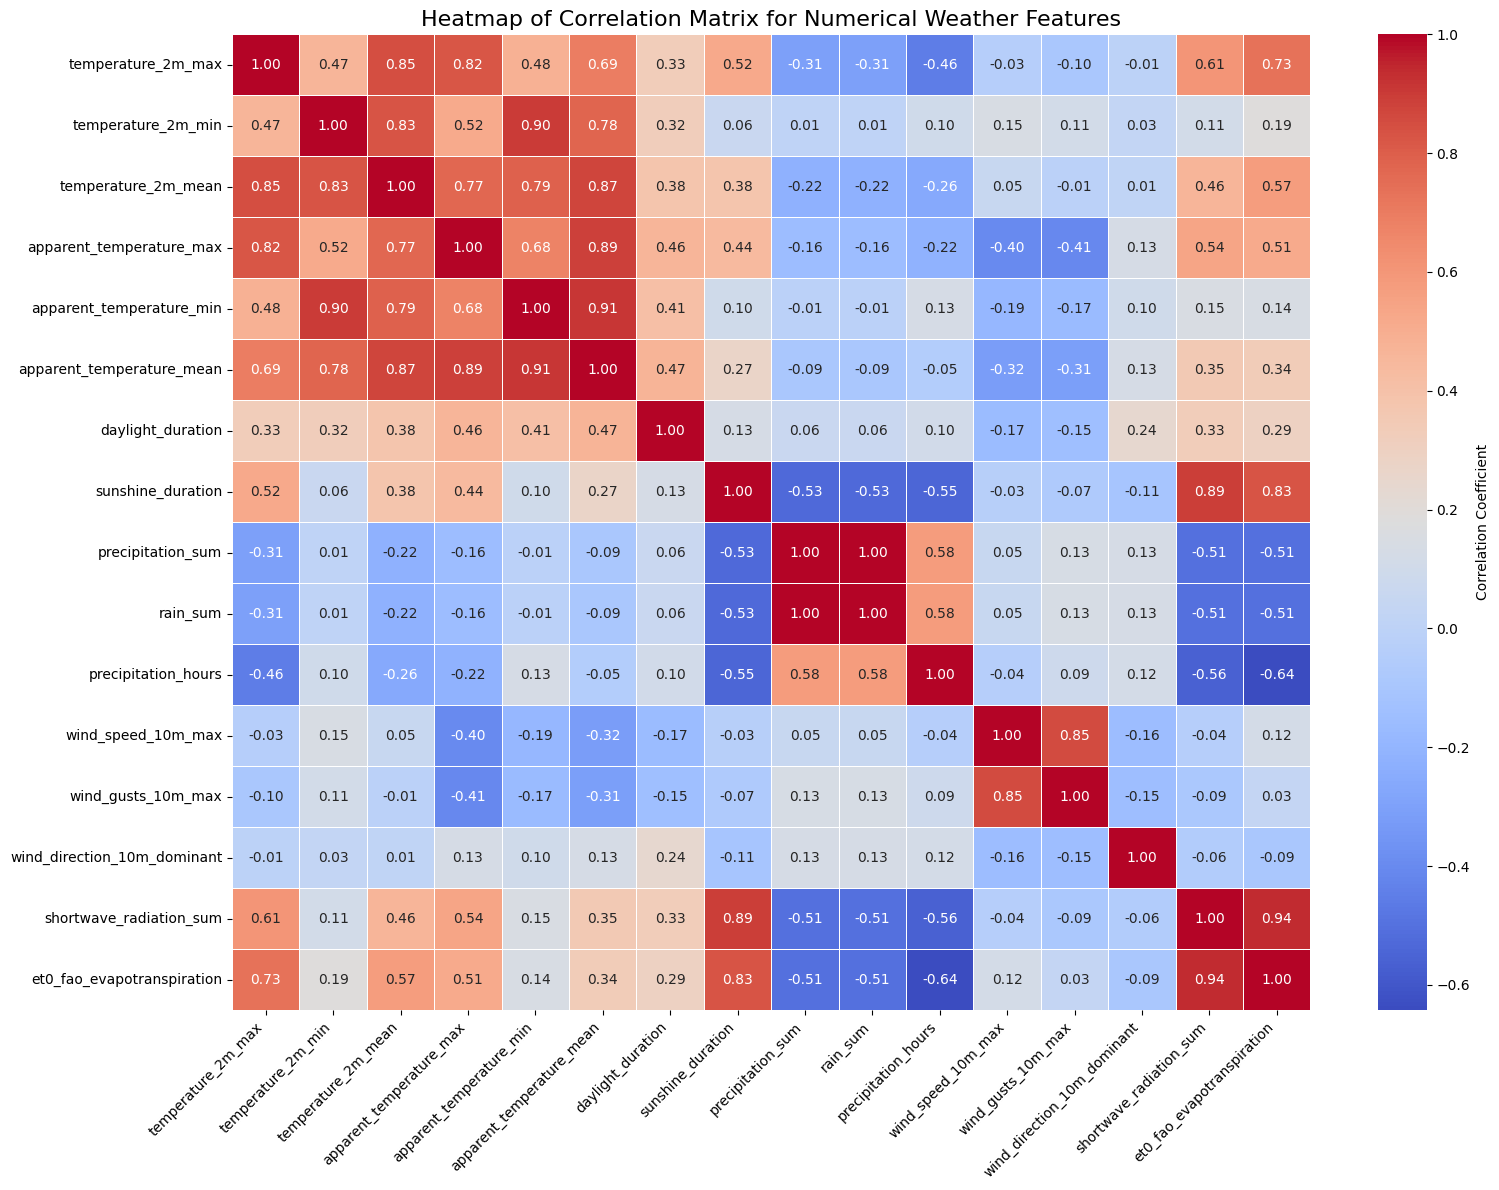

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude datetime, sunrise, and sunset as they are not purely numerical for correlation
# Also exclude weather_code as it's categorical even though numerically encoded
# Exclude snowfall_sum as it is not relevant to the Philippines' climate

# Select only numerical columns for correlation calculation
numerical_data_for_heatmap = data.select_dtypes(include=['number']).drop(columns=['weather_code', 'snowfall_sum'], errors='ignore')

# Calculate the correlation matrix
corr_matrix = numerical_data_for_heatmap.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with a mask and correct aspect ratio
sns.heatmap(
    corr_matrix,
    annot=True,      # Show the correlation values on the heatmap
    fmt=".2f",       # Format annotations to two decimal places
    cmap="coolwarm", # Choose a diverging colormap
    linewidths=.5,   # Add lines between cells
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Heatmap of Correlation Matrix for Numerical Weather Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Conclusion

As shown in the correlation analysis, the variables precipitation_sum and rain_sum exhibit a perfect correlation (1.00), indicating that they contain identical information in this dataset. Although the two variables are conceptually different, their values are the same due to the absence of non-rain precipitation events. To avoid redundancy and potential multicollinearity issues, one of these variables was removed prior to modeling. This step is particularly important for models sensitive to correlated features, while tree-based models are generally less affected by such redundancy

> ### Encoding

In [22]:
data.head(3)

,city_name,datetime,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,Alaminos,2020-01-01,1.0,32.4,23.1,26.9,35.6,25.1,30.1,2020-01-01 06:27:00,2020-01-01 17:38:00,40263.84,36299.32,0.0,0.0,0.0,0.0,18.0,33.5,82.0,18.68,4.37
1,Alaminos,2020-01-02,1.0,32.7,25.4,27.8,35.6,27.1,30.5,2020-01-02 06:28:00,2020-01-02 17:39:00,40277.32,36381.88,0.0,0.0,0.0,0.0,18.0,35.6,91.0,18.57,4.85
2,Alaminos,2020-01-03,3.0,31.3,23.2,26.5,33.3,25.2,28.7,2020-01-03 06:28:00,2020-01-03 17:40:00,40292.00,36385.75,0.0,0.0,0.0,0.0,17.6,33.8,103.0,18.02,4.47


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206001 entries, 0 to 206000
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   city_name                    206001 non-null  object        
 1   datetime                     206001 non-null  datetime64[ns]
 2   weather_code                 206001 non-null  float64       
 3   temperature_2m_max           206001 non-null  float64       
 4   temperature_2m_min           206001 non-null  float64       
 5   temperature_2m_mean          206001 non-null  float64       
 6   apparent_temperature_max     206001 non-null  float64       
 7   apparent_temperature_min     206001 non-null  float64       
 8   apparent_temperature_mean    206001 non-null  float64       
 9   sunrise                      206001 non-null  datetime64[ns]
 10  sunset                       206001 non-null  datetime64[ns]
 11  daylight_duration         

In [24]:
data['weather_code'].value_counts()

weather_code
63.0    54534
51.0    47232
61.0    31064
53.0    29241
65.0    13934
55.0    11183
3.0      6377
1.0      6308
2.0      5648
0.0       480
Name: count, dtype: int64

- Check how many cities there

In [25]:
num_unique_cities = data['city_name'].nunique()
print(f"Total of cities: {num_unique_cities}")

Total of cities: 137


In [26]:
data['city_name'].value_counts()

city_name
Lipa City               2922
Lucena                  2922
Maasin                  2922
Mabalacat City          2922
Alaminos                1461
Palayan City            1461
Olongapo                1461
Ormoc                   1461
Oroquieta               1461
Ozamiz City             1461
Pagadian                1461
Pasig                   1461
Panabo                  1461
Paranaque City          1461
Naga                    1461
Puerto Princesa City    1461
Quezon City             1461
Roxas                   1461
Navotas                 1461
Meycauayan              1461
Muñoz                   1461
Lapu-Lapu City          1461
Mati                    1461
Marawi                  1461
Manila                  1461
Mandaue City            1461
Mandaluyong City        1461
Malolos                 1461
Malaybalay              1461
Malabon                 1461
Makati City             1461
Ligao                   1461
Legazpi City            1461
Sagay                   1461
Sama

> ### Let's divide city name

In [27]:
north = [
    "Mabalacat City","Lipa City","Lucena","Bacoor","Angeles City","Antipolo",
    "Alaminos","Balanga","Baguio","Batac City","Batangas City","Biñan",
    "Cabanatuan City","Caloocan City","Candon","Cauayan","Cavite City",
    "Calamba","Calapan","Dagupan","Gapan","General Trias","Ilagan","Imus",
    "Iriga City","Isabela","Laoag","City of Marikina","Malolos","Makati City",
    "Malabon","Meycauayan","Muñoz","Naga","Navotas","Olongapo","Palayan City",
    "Paranaque City","Pasig","Puerto Princesa City","Quezon City","San Fernando",
    "San Jose","San Jose del Monte","San Juan","San Pablo","San Pedro",
    "Santa Rosa","Santo Tomas","Tabaco","Tabuk","Tagaytay City","Taguig",
    "Tanauan","Tarlac City","Tayabas","Tuguegarao","Urdaneta","Valenzuela",
    "Vigan","Las Piñas","Manila"
]

central = [
    "Bacolod","Bago City","Bais","Bayawan","Baybay","Borongan","Bogo",
    "Calbayog City","Canlaon","Carcar","Catbalogan","Cebu City","Cadiz",
    "Danao","Dumaguete","Escalante","Himamaylan","Iloilo City","Kabankalan",
    "La Carlota","Lapu-Lapu City","Mandaue City","Ormoc","Roxas","Sagay",
    "San Carlos","Silay City","Sipalay","Tacloban City","Talisay","Tanjay",
    "Toledo City","Victorias","City of Masbate","City of Passi",
    "City of Sorsogon"
]

south = [
    "Butuan","Cabadbaran","Bayugan","Bislig","Cagayan de Oro","Cotabato",
    "Dapitan","Davao","Digos","Dipolog","El Salvador","General Santos",
    "Gingoog City","Iligan City","Kidapawan","Koronadal","Lamitan","Malaybalay",
    "Marawi","Mati","Oroquieta","Ozamiz City","Pagadian","Panabo","Samal",
    "Surigao City","Tacurong","Tandag","Tangub","Valencia","Zamboanga City"
]


region_map = {city: "North" for city in north}
region_map.update({city: "Central" for city in central})
region_map.update({city: "South" for city in south})

data["region"] = data["city_name"].map(region_map)


In [28]:
region_map.update({

    # ===== NORTH (Luzon) =====
    "Cabuyao": "North",
    "Carmona": "North",
    "Calaca": "North",
    "Dasmariñas": "North",
    "Mandaluyong City": "North",
    "Legazpi City": "North",
    "Ligao": "North",

    # ===== CENTRAL (Visayas) =====
    "Maasin": "Central",

})
data["region"] = data["city_name"].map(region_map)


In [29]:
# 1. HARUS 0
data["region"].isna().sum()


0

In [30]:
# 2. HARUS 137
data.groupby("region")["city_name"].nunique().sum()


137

In [31]:
missing = (
    data.loc[data["region"].isna(), "city_name"]
    .value_counts()
)
missing


Series([], Name: count, dtype: int64)

> ### ✅ Drop Decisions

1. Weather Code
Weather code features were removed because they represent categorical daily weather conditions. Since the data were aggregated to a monthly level, these daily categorical indicators no longer retain meaningful information and could introduce noise into the model.

2. Rain Sum
The rain_sum variable was dropped due to its near-perfect correlation (≈ 1.00) with precipitation_sum. Keeping both features would introduce redundant information and increase the risk of multicollinearity without improving predictive performance.

3. City Name
The city_name feature was excluded because it has high cardinality and primarily serves as an identifier rather than a predictive feature. Spatial information is already captured through the region variable, which provides a more generalized and climate-relevant representation for modeling.

In [32]:
drop_cols = [
    "weather_code",
    "rain_sum",
    "city_name"
]

data = data.drop(columns=drop_cols)


In [33]:
data.tail()

,datetime,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,region
205996,2023-12-27,32.3,25.4,28.4,37.1,29.9,33.5,2023-12-27 06:00:00,2023-12-27 17:43:00,42197.58,39202.73,0.1,0.0,1.0,13.1,33.8,80.0,22.07,4.69,South
205997,2023-12-28,32.1,26.3,28.8,37.9,30.9,34.1,2023-12-28 06:01:00,2023-12-28 17:44:00,42200.53,39280.00,0.3,0.0,3.0,14.4,34.2,77.0,21.85,4.71,South
205998,2023-12-29,31.9,26.4,29.0,37.4,30.1,33.5,2023-12-29 06:01:00,2023-12-29 17:44:00,42204.00,39359.85,0.4,0.0,3.0,15.3,33.5,56.0,22.01,4.85,South
205999,2023-12-30,31.1,25.7,28.1,37.5,30.1,33.3,2023-12-30 06:02:00,2023-12-30 17:45:00,42207.99,38270.35,1.1,0.0,2.0,13.6,30.6,68.0,20.41,4.31,South
206000,2023-12-31,31.8,26.3,28.7,38.6,31.0,34.2,2023-12-31 06:02:00,2023-12-31 17:45:00,42212.49,39145.15,0.8,0.0,5.0,10.5,25.9,56.0,21.19,4.50,South


In [35]:
data['region'].value_counts()

region
North      105192
Central     55518
South       45291
Name: count, dtype: int64

In [36]:
data.head()

,datetime,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,region
0,2020-01-01,32.4,23.1,26.9,35.6,25.1,30.1,2020-01-01 06:27:00,2020-01-01 17:38:00,40263.84,36299.32,0.0,0.0,0.0,18.0,33.5,82.0,18.68,4.37,North
1,2020-01-02,32.7,25.4,27.8,35.6,27.1,30.5,2020-01-02 06:28:00,2020-01-02 17:39:00,40277.32,36381.88,0.0,0.0,0.0,18.0,35.6,91.0,18.57,4.85,North
2,2020-01-03,31.3,23.2,26.5,33.3,25.2,28.7,2020-01-03 06:28:00,2020-01-03 17:40:00,40292.00,36385.75,0.0,0.0,0.0,17.6,33.8,103.0,18.02,4.47,North
3,2020-01-04,30.2,21.6,25.5,32.4,22.8,27.7,2020-01-04 06:28:00,2020-01-04 17:40:00,40307.85,36506.23,0.0,0.0,0.0,15.5,30.2,73.0,19.51,4.40,North
4,2020-01-05,31.9,23.8,26.7,33.1,25.3,28.6,2020-01-05 06:29:00,2020-01-05 17:41:00,40324.83,36564.63,0.0,0.0,0.0,19.8,38.9,96.0,19.56,4.95,North


> ## MACHINE LEARNING! MODELING!

- Time-Based Train–Test Split

In [38]:
# ensure datetime type (safety check)
data["datetime"] = pd.to_datetime(data["datetime"])

# train: 2020–2022
train = data[data["datetime"] < "2023-01-01"].copy()

# test: 2023
test  = data[
    (data["datetime"] >= "2023-01-01") &
    (data["datetime"] < "2024-01-01")
].copy()


Why not use an 80/20 split?
An 80/20 random split is not appropriate for time-dependent data because it would break the temporal order and potentially introduce data leakage.

Why use 2023 as the test set?
The year 2023 is used as a proxy for the future to evaluate how well the model generalizes to unseen time periods.

The dataset is split using a datetime boundary to preserve temporal order.
The year 2023 is used as a temporal hold-out set to evaluate model generalization.
Categorical encoding is applied after splitting to prevent data leakage.

- ### filter wind speed dan guts yang sus!

In [39]:
MAX_WIND_SPEED = 32
MAX_WIND_GUST  = 70

train = train[
    (train["wind_speed_10m_max"] <= MAX_WIND_SPEED) &
    (train["wind_gusts_10m_max"] <= MAX_WIND_GUST)
]

test = test[
    (test["wind_speed_10m_max"] <= MAX_WIND_SPEED) &
    (test["wind_gusts_10m_max"] <= MAX_WIND_GUST)
]


> ### Encoding, One-Hot Encoding (OHE)

In [40]:
train = pd.get_dummies(train, columns=["region"], drop_first=True)
test  = pd.get_dummies(test, columns=["region"], drop_first=True)

# align columns
test = test.reindex(columns=train.columns, fill_value=0)


In [41]:
assert train.columns.equals(test.columns)


In [53]:
train.head()

,datetime,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,region_North,region_South
0,2020-01-01,32.4,23.1,26.9,35.6,25.1,30.1,2020-01-01 06:27:00,2020-01-01 17:38:00,40263.84,36299.32,0.0,0.0,0.0,18.0,33.5,82.0,18.68,4.37,False,False
1,2020-01-02,32.7,25.4,27.8,35.6,27.1,30.5,2020-01-02 06:28:00,2020-01-02 17:39:00,40277.32,36381.88,0.0,0.0,0.0,18.0,35.6,91.0,18.57,4.85,False,False
2,2020-01-03,31.3,23.2,26.5,33.3,25.2,28.7,2020-01-03 06:28:00,2020-01-03 17:40:00,40292.00,36385.75,0.0,0.0,0.0,17.6,33.8,103.0,18.02,4.47,False,False
3,2020-01-04,30.2,21.6,25.5,32.4,22.8,27.7,2020-01-04 06:28:00,2020-01-04 17:40:00,40307.85,36506.23,0.0,0.0,0.0,15.5,30.2,73.0,19.51,4.40,False,False
4,2020-01-05,31.9,23.8,26.7,33.1,25.3,28.6,2020-01-05 06:29:00,2020-01-05 17:41:00,40324.83,36564.63,0.0,0.0,0.0,19.8,38.9,96.0,19.56,4.95,False,False


In [52]:
# Memfilter baris di mana North DAN South keduanya bernilai False
filter_keduanya = train[(train['region_North'] == False) & (train['region_South'] == False)]

# Atau cara yang lebih singkat (menggunakan operator negasi ~)
filter_keduanya = train[~train['region_North'] & ~train['region_South']]

filter_keduanya.head()

,datetime,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,region_North,region_South
0,2020-01-01,32.4,23.1,26.9,35.6,25.1,30.1,2020-01-01 06:27:00,2020-01-01 17:38:00,40263.84,36299.32,0.0,0.0,0.0,18.0,33.5,82.0,18.68,4.37,False,False
1,2020-01-02,32.7,25.4,27.8,35.6,27.1,30.5,2020-01-02 06:28:00,2020-01-02 17:39:00,40277.32,36381.88,0.0,0.0,0.0,18.0,35.6,91.0,18.57,4.85,False,False
2,2020-01-03,31.3,23.2,26.5,33.3,25.2,28.7,2020-01-03 06:28:00,2020-01-03 17:40:00,40292.00,36385.75,0.0,0.0,0.0,17.6,33.8,103.0,18.02,4.47,False,False
3,2020-01-04,30.2,21.6,25.5,32.4,22.8,27.7,2020-01-04 06:28:00,2020-01-04 17:40:00,40307.85,36506.23,0.0,0.0,0.0,15.5,30.2,73.0,19.51,4.40,False,False
4,2020-01-05,31.9,23.8,26.7,33.1,25.3,28.6,2020-01-05 06:29:00,2020-01-05 17:41:00,40324.83,36564.63,0.0,0.0,0.0,19.8,38.9,96.0,19.56,4.95,False,False


Why there is only region_North and region_South? Where is Central?

Well, if both of them are False, it's mean Central isn't?

- Create Cyclical Month Features

Months are cyclical (Dec → Jan). Using sine/cosine preserves this continuity and helps the model learn seasonality.

In [42]:
import numpy as np
import pandas as pd

def add_month_cyclical(df):
    df = df.copy()

    # Ensure datetime
    df["datetime"] = pd.to_datetime(df["datetime"])

    # Extract month
    df["month"] = df["datetime"].dt.month

    # Cyclical encoding
    df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
    df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

    # Drop unused columns
    df.drop(columns=["datetime", "month"], inplace=True)

    return df


In [43]:
data_transformed = add_month_cyclical(data)


In [44]:
data_transformed.dtypes


temperature_2m_max                    float64
temperature_2m_min                    float64
temperature_2m_mean                   float64
apparent_temperature_max              float64
apparent_temperature_min              float64
apparent_temperature_mean             float64
sunrise                        datetime64[ns]
sunset                         datetime64[ns]
daylight_duration                     float64
sunshine_duration                     float64
precipitation_sum                     float64
snowfall_sum                          float64
precipitation_hours                   float64
wind_speed_10m_max                    float64
wind_gusts_10m_max                    float64
wind_direction_10m_dominant           float64
shortwave_radiation_sum               float64
et0_fao_evapotranspiration            float64
region                                 object
month_sin                             float64
month_cos                             float64
dtype: object

In [45]:
month_table_from_data = (
    data
    .assign(
        month=pd.to_datetime(data["datetime"]).dt.month,
        month_sin=lambda x: np.sin(2 * np.pi * x["month"] / 12),
        month_cos=lambda x: np.cos(2 * np.pi * x["month"] / 12),
    )
    [["month", "month_sin", "month_cos"]]
    .drop_duplicates()
    .sort_values("month")
)

month_table_from_data


,month,month_sin,month_cos
0,1,5.000000e-01,8.660254e-01
31,2,8.660254e-01,5.000000e-01
60,3,1.000000e+00,6.123234e-17
91,4,8.660254e-01,-5.000000e-01
121,5,5.000000e-01,-8.660254e-01
152,6,1.224647e-16,-1.000000e+00
182,7,-5.000000e-01,-8.660254e-01
213,8,-8.660254e-01,-5.000000e-01
244,9,-1.000000e+00,-1.836970e-16
274,10,-8.660254e-01,5.000000e-01


In [46]:
data_transformed.head(1)

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,region,month_sin,month_cos
0,32.4,23.1,26.9,35.6,25.1,30.1,2020-01-01 06:27:00,2020-01-01 17:38:00,40263.84,36299.32,0.0,0.0,0.0,18.0,33.5,82.0,18.68,4.37,North,0.5,0.866025



## Explanation of `month_sin` and `month_cos`

### What are `month_sin` and `month_cos`?

`month_sin` and `month_cos` are **cyclical representations of the month**.

Months are **cyclical**, not linear:

* After December (12), the cycle goes back to January (1).
* January and December are **close in time**, even though their numbers (1 and 12) are far apart.

To represent this correctly, each month is mapped onto a **circle** using sine and cosine functions.

---

### How are they calculated?

For each month (1–12):

```text
month_sin = sin(2π × month / 12)
month_cos = cos(2π × month / 12)
```

* `month_sin` represents the **vertical position** on the circle
* `month_cos` represents the **horizontal position** on the circle

Together, they define a **unique position for each month**.

---

### How to read the table?

|    Month | month_sin | month_cos | Interpretation                |
| -------: | --------: | --------: | ----------------------------- |
|  1 (Jan) |      0.50 |      0.87 | Early year, close to December |
|  3 (Mar) |      1.00 |     ~0.00 | Top of the cycle              |
|  6 (Jun) |     ~0.00 |     -1.00 | Middle of the year            |
|  9 (Sep) |     -1.00 |     ~0.00 | Bottom of the cycle           |
| 12 (Dec) |     ~0.00 |      1.00 | End of year, close to January |

Small values such as `6.12e-17` or `-2.45e-16` are **numerical rounding effects** and should be interpreted as **zero**.

---

### Why are two values needed?

Using only one value (for example, `month_sin`) is not enough because:

* Different months can share the same sine value
* `month_sin` and `month_cos` together uniquely identify each month

This is similar to using **latitude and longitude** to locate a place on Earth.

---

### Why is this useful for machine learning?

Using `month = 1–12` directly creates a false distance:

* December (12) appears far from January (1)

With `month_sin` and `month_cos`:

* December and January have **similar coordinates**
* Seasonal patterns are continuous
* Models can learn **seasonality without artificial breaks**

This is especially helpful when predicting future periods, such as **year 2026**, because the model learns **seasonal behavior**, not specific years.

---

### One-sentence summary

> **`month_sin` and `month_cos` transform months into a circular numerical representation that preserves seasonal continuity and improves how models learn time-based patterns.**


> ### Scaling

- only for non decision tree. for:

All features are fairly weighted

Stable model optimization

Interpretable coefficients

Improved prediction performance

> ### Modeling

---

## Why We Chose Three Tree-Based Models

We selected **three tree-based models**—**Decision Tree, Random Forest, and XGBoost**—to model monthly weather patterns because they provide a **structured comparison across different levels of model complexity** while remaining suitable for seasonal forecasting.

---

### 1. Decision Tree (Baseline Model)

The Decision Tree was chosen as a **baseline model**.

* It is easy to interpret
* It captures non-linear relationships
* It shows how much performance can be achieved with a single tree

This model serves as a **reference point** to evaluate the benefits of more advanced ensemble methods.

---

### 2. Random Forest (Stable Ensemble Model)

Random Forest was selected to address the **overfitting issue** of a single Decision Tree.

* It combines many trees using **bagging**
* It reduces variance and improves stability
* It performs well with noisy, real-world data

This makes Random Forest a **robust and reliable model** for weather prediction using limited historical data (2020–2023).

---

### 3. XGBoost (High-Performance Model)

XGBoost was chosen as a **high-performance boosting model**.

* It builds trees sequentially to correct previous errors
* It captures complex feature interactions
* It often achieves the best predictive accuracy

XGBoost represents the **upper performance bound** of tree-based methods in this study.

---

## Why Tree-Based Models Are Suitable for This Task

Tree-based models are well suited for monthly weather forecasting because they:

* Handle **non-linear relationships** naturally
* Are robust to **multicollinearity**
* Do not require **feature scaling**
* Work well with **engineered seasonal features** such as `month_sin` and `month_cos`

---

## Summary Table

| Model         | Role in Study     | Purpose                      |
| ------------- | ----------------- | ---------------------------- |
| Decision Tree | Baseline          | Interpretability & reference |
| Random Forest | Bagging Ensemble  | Stability & robustness       |
| XGBoost       | Boosting Ensemble | Best achievable performance  |

---

## One-Sentence Summary

> **Three tree-based models were selected to represent increasing levels of complexity—baseline, bagging, and boosting—while ensuring robustness and strong performance for seasonal weather forecasting.**



In [ ]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from xgboost import XGBRegressor


In [ ]:
data_transformed.head()

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,region,month_sin,month_cos
0,32.4,23.1,26.9,35.6,25.1,30.1,2020-01-01 06:27:00,2020-01-01 17:38:00,40263.84,36299.32,0.0,0.0,0.0,18.0,33.5,82.0,18.68,4.37,North,0.5,0.866025
1,32.7,25.4,27.8,35.6,27.1,30.5,2020-01-02 06:28:00,2020-01-02 17:39:00,40277.32,36381.88,0.0,0.0,0.0,18.0,35.6,91.0,18.57,4.85,North,0.5,0.866025
2,31.3,23.2,26.5,33.3,25.2,28.7,2020-01-03 06:28:00,2020-01-03 17:40:00,40292.00,36385.75,0.0,0.0,0.0,17.6,33.8,103.0,18.02,4.47,North,0.5,0.866025
3,30.2,21.6,25.5,32.4,22.8,27.7,2020-01-04 06:28:00,2020-01-04 17:40:00,40307.85,36506.23,0.0,0.0,0.0,15.5,30.2,73.0,19.51,4.40,North,0.5,0.866025
4,31.9,23.8,26.7,33.1,25.3,28.6,2020-01-05 06:29:00,2020-01-05 17:41:00,40324.83,36564.63,0.0,0.0,0.0,19.8,38.9,96.0,19.56,4.95,North,0.5,0.866025


> ### Drop the column that actually one family with temperature

- target

In [ ]:
target_cols = [
    "temperature_2m_min",
    "temperature_2m_mean",
    "temperature_2m_max"
]

y_train = train[target_cols]
y_test  = test[target_cols]


In [ ]:
drop_cols = target_cols + [
    "apparent_temperature_max",
    "apparent_temperature_min",
    "apparent_temperature_mean"
]

X_train = train.drop(columns=drop_cols)
X_test  = test.drop(columns=drop_cols)

---

## Why These Columns Were Dropped

### Dropped Columns Definition

```python
drop_cols = target_cols + [
    "apparent_temperature_max",
    "apparent_temperature_min",
    "apparent_temperature_mean"
]

X_train = train.drop(columns=drop_cols)
X_test  = test.drop(columns=drop_cols)
```

These columns were removed to **prevent data leakage** and to ensure that the model is trained using **independent and deployable predictors**.

---

## 1. Target Variables Must Be Excluded from Features

In this study, the prediction targets are defined as a **multi-output variable** consisting of:

* `temperature_2m_min`
* `temperature_2m_mean`
* `temperature_2m_max`

Including any of these variables in the feature set would result in **direct feature leakage**, as the model would have access to the exact values it is expected to predict.

For this reason, **all target columns are explicitly removed from `X_train` and `X_test`**.

---

## 2. Apparent Temperature as a Target Proxy

The apparent temperature variables are **derived meteorological quantities**, calculated from air temperature in combination with wind speed and radiation.

Because the model’s targets are themselves temperature-based metrics, apparent temperature variables act as **strong proxies for the targets**. Including them would allow the model to infer the target values indirectly, leading to **statistical leakage** even though the variables are not identical.

---

## 3. Ensuring a Realistic Prediction Setup

Both air temperature and apparent temperature variables represent **daily aggregated values**, which are only fully known after the observation period has ended.

By excluding these variables, the model is trained only on features that are:

* **Independent of the targets**
* **Available at prediction time**
* **Physically meaningful drivers** (e.g., radiation, wind, precipitation, seasonality)

This ensures that model evaluation reflects **realistic forecasting conditions**.

---

## Summary

The dropped columns were excluded because they:

* Are **explicit prediction targets**
* Act as **direct or indirect proxies** for the targets
* Introduce **data leakage** and invalidate model evaluation

Removing these variables ensures that the model learns genuine relationships between atmospheric drivers and daily temperature characteristics, resulting in **reliable and interpretable performance estimates**.

---



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# -------------------------------
# Decision Tree (Baseline)
# -------------------------------
dt_model = DecisionTreeRegressor(
    random_state=42
    # random_state: ensure reproducibility
    # no max_depth set -> allow tree to show raw overfitting behavior
    # this acts as a baseline reference model
)

# -------------------------------
# Random Forest (Stable Ensemble)
# -------------------------------
rf_model = RandomForestRegressor(
    n_estimators=300,     # enough trees to reduce variance (common baseline range: 200–500)
    random_state=42,      # reproducibility
    n_jobs=-1             # use all CPU cores
    # no max_depth -> allow trees to grow naturally
    # goal: stability, not aggressive optimization
)

# -------------------------------
# XGBoost (Boosting Baseline)
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=300,     # moderate number of trees for learning complex patterns
    learning_rate=0.1,   # standard default; balances learning speed and stability
    max_depth=6,         # common depth for tabular data (avoids shallow underfit or deep overfit)
    subsample=1.0,       # use full dataset for a fair baseline comparison
    colsample_bytree=1.0,# use all features per tree (no additional randomness at baseline stage)
    objective="reg:squarederror",  # regression task with squared error loss
    random_state=42      # reproducibility
    # NOTE:
    # these values are NOT tuned
    # they represent commonly accepted baseline settings
)


In [ ]:
datetime_cols = X_train.select_dtypes(include="datetime64").columns

X_train = X_train.drop(columns=datetime_cols)
X_test  = X_test.drop(columns=datetime_cols)


In [ ]:
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

> ### PREDICT

In [ ]:
dt_pred  = dt_model.predict(X_test)
rf_pred  = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

results = {
    "Decision Tree": evaluate_model(y_test, dt_pred),
    "Random Forest": evaluate_model(y_test, rf_pred),
    "XGBoost": evaluate_model(y_test, xgb_pred)
}

import pandas as pd
results_df = pd.DataFrame(results).T
results_df


,R2,MAE,RMSE
Decision Tree,0.418474,0.987094,1.353206
Random Forest,0.719331,0.689988,0.941017
XGBoost,0.734893,0.669261,0.912266


> ### Summarize

The best model based on non-hyperparameter tuning is XGBoost with Score of
R2 = 0.734893 that actually better rather than others model, Show the model is learning and not memorizing. with MAE = 0.56 Celcius and RMSE = 0.77 Celcius


> ### HYPERPARAMETER TUNING

- Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dt = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4],
}

dt_base = DecisionTreeRegressor(
    random_state=42
)

search_dt = RandomizedSearchCV(
    estimator=dt_base,
    param_distributions=param_dt,
    n_iter=6,
    scoring="r2",
    cv=2,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search_dt.fit(X_train, y_train)


Fitting 2 folds for each of 6 candidates, totalling 12 fits


RandomizedSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=6, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42, scoring='r2', verbose=1)

- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_rf = {
    "n_estimators": [150, 200],
    "max_depth": [None, 15],
    "min_samples_leaf": [1, 2],
}

rf_base = RandomForestRegressor(
    random_state=42,
    n_jobs=1   # penting biar CPU ga KO
)

search_rf = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_rf,
    n_iter=5,        # ⬅️ kunci: kecil tapi efektif
    scoring="r2",
    cv=2,            # ⬅️ cukup
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search_rf.fit(X_train, y_train)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestRegressor(n_jobs=1, random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [None, 15],
                                        'min_samples_leaf': [1, 2],
                                        'n_estimators': [150, 200]},
                   random_state=42, scoring='r2', verbose=1)

- XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

param_xgb = {
    "max_depth": [3, 4],
    "learning_rate": [0.05, 0.1],
}

xgb_base = XGBRegressor(
    n_estimators=200,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=4
)

search_xgb = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_xgb,
    n_iter=4,
    scoring="r2",
    cv=2,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search_xgb.fit(X_train, y_train)


Fitting 2 folds for each of 4 candidates, totalling 8 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=4, num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=4, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_depth': [3, 4]},
                   random_state=42, scoring='r2', verbose=1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --------------------------------------------------
# Helper function
# --------------------------------------------------
def evaluate_model(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

# --------------------------------------------------
# Get FINAL models
# --------------------------------------------------
best_dt        = search_dt.best_estimator_      # Decision Tree (tuned)
best_rf_base   = rf_model                      # Random Forest (baseline)
best_rf_tuned  = search_rf.best_estimator_     # Random Forest (tuned)
best_xgb       = search_xgb.best_estimator_    # XGBoost (tuned)

# --------------------------------------------------
# Prediction
# --------------------------------------------------
dt_pred       = best_dt.predict(X_test)
rf_base_pred  = best_rf_base.predict(X_test)
rf_tuned_pred = best_rf_tuned.predict(X_test)
xgb_pred      = best_xgb.predict(X_test)

# --------------------------------------------------
# Evaluation & comparison table
# --------------------------------------------------
comparison = pd.DataFrame({
    "Decision Tree (Tuned)": evaluate_model(y_test, dt_pred),
    # "Random Forest (Baseline)": evaluate_model(y_test, rf_base_pred),
    "Random Forest (Tuned)": evaluate_model(y_test, rf_tuned_pred),
    "XGBoost (Tuned)": evaluate_model(y_test, xgb_pred)
}).T

comparison


,R2,MAE,RMSE
Decision Tree (Tuned),0.552606,0.867859,1.199438
Random Forest (Tuned),0.718718,0.690784,0.942024
XGBoost (Tuned),0.688646,0.719445,0.990002


Based on the evaluation results, XGBoost without extensive hyperparameter tuning achieved the best overall performance, with the highest R² and the lowest error values. Random Forest also showed strong and stable performance using a baseline configuration. Hyperparameter tuning significantly improved Decision Tree performance, while tuning XGBoost resulted in reduced generalization, indicating that its baseline configuration was already well-optimized.

> ### PREDICTION MODEL!

The 2026 forecast is generated by extrapolating historical seasonal patterns learned by the model and does not account for unexpected external climate anomalies.

In [ ]:
data_transformed.head()

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,region,month_sin,month_cos
0,32.4,23.1,26.9,35.6,25.1,30.1,2020-01-01 06:27:00,2020-01-01 17:38:00,40263.84,36299.32,0.0,0.0,0.0,18.0,33.5,82.0,18.68,4.37,North,0.5,0.866025
1,32.7,25.4,27.8,35.6,27.1,30.5,2020-01-02 06:28:00,2020-01-02 17:39:00,40277.32,36381.88,0.0,0.0,0.0,18.0,35.6,91.0,18.57,4.85,North,0.5,0.866025
2,31.3,23.2,26.5,33.3,25.2,28.7,2020-01-03 06:28:00,2020-01-03 17:40:00,40292.00,36385.75,0.0,0.0,0.0,17.6,33.8,103.0,18.02,4.47,North,0.5,0.866025
3,30.2,21.6,25.5,32.4,22.8,27.7,2020-01-04 06:28:00,2020-01-04 17:40:00,40307.85,36506.23,0.0,0.0,0.0,15.5,30.2,73.0,19.51,4.40,North,0.5,0.866025
4,31.9,23.8,26.7,33.1,25.3,28.6,2020-01-05 06:29:00,2020-01-05 17:41:00,40324.83,36564.63,0.0,0.0,0.0,19.8,38.9,96.0,19.56,4.95,North,0.5,0.866025


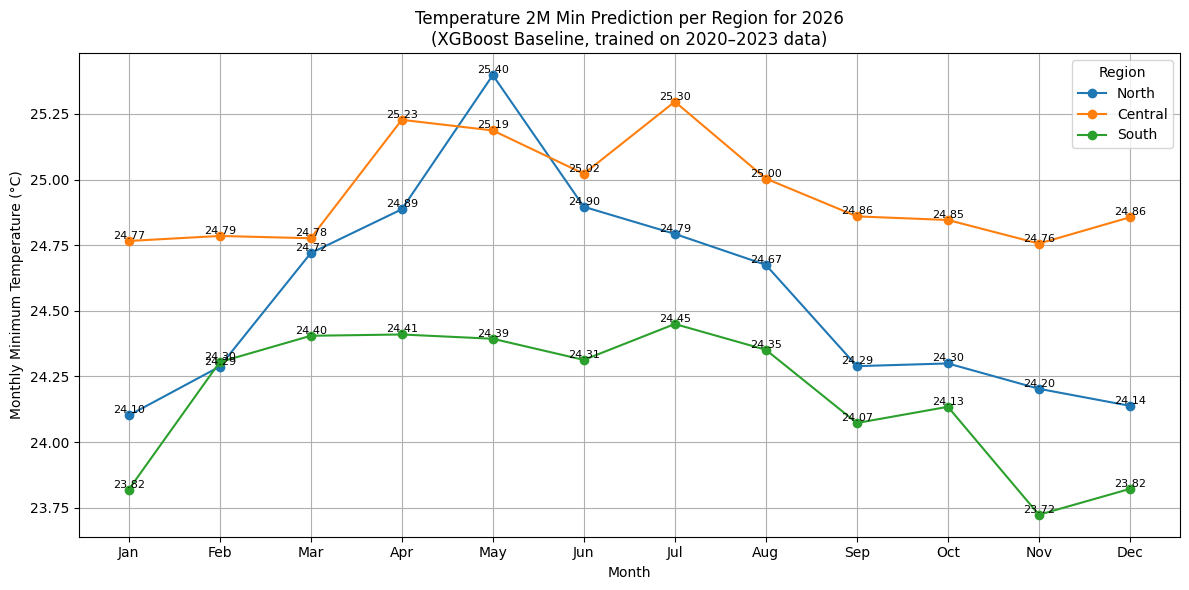

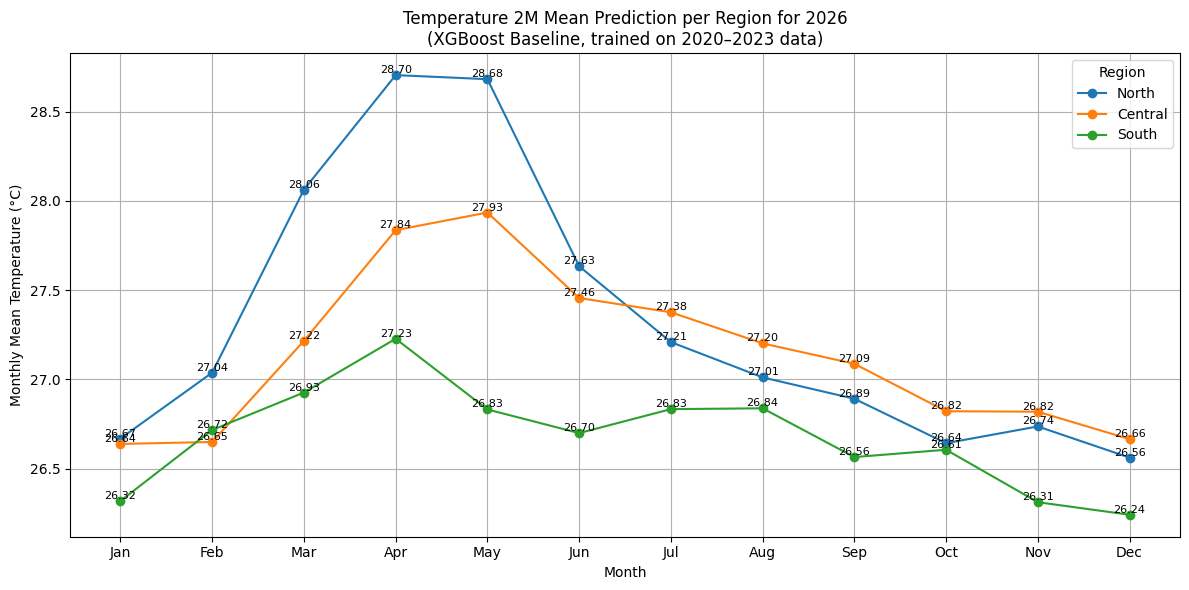

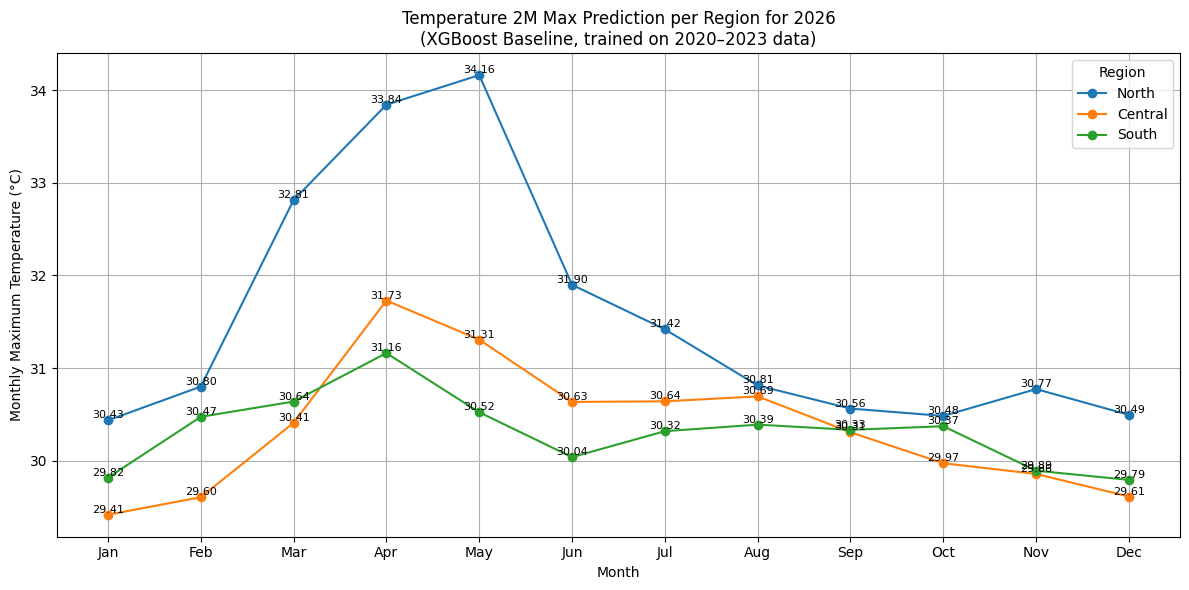

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# MONTHLY PREDICTION PER REGION (XGBOOST BASELINE)
# MULTI-TARGET VISUALIZATION
# ============================================================

df = data_transformed.copy()
df["month"] = pd.to_datetime(df["sunrise"]).dt.month

regions = df["region"].unique()

# Target configuration
target_info = {
    0: ("temperature_2m_min",  "Monthly Minimum Temperature (°C)"),
    1: ("temperature_2m_mean", "Monthly Mean Temperature (°C)"),
    2: ("temperature_2m_max",  "Monthly Maximum Temperature (°C)")
}

for target_idx, (target_name, y_label) in target_info.items():

    plt.figure(figsize=(12, 6))

    for region in regions:
        # 1. Filter per region
        df_region = df[df["region"] == region]

        # 2. Monthly aggregation
        monthly_features = (
            df_region
            .groupby("month")
            .mean(numeric_only=True)
            .reset_index()
        )

        # 3. One-hot region
        for col in [c for c in X_train.columns if c.startswith("region_")]:
            monthly_features[col] = 0
        monthly_features[f"region_{region}"] = 1

        # 4. Align features
        X_monthly = monthly_features[X_train.columns]

        # 5. Predict (ambil kolom target tertentu)
        preds = xgb_model.predict(X_monthly)
        monthly_features["prediction"] = preds[:, target_idx]

        # 6. Plot
        month_name = pd.to_datetime(
            monthly_features["month"], format="%m"
        ).dt.strftime("%b")

        plt.plot(
            month_name,
            monthly_features["prediction"],
            marker="o",
            label=region
        )

        # Label nilai
        for i, val in enumerate(monthly_features["prediction"]):
            plt.text(i, val, f"{val:.2f}", fontsize=8, ha="center", va="bottom")

    plt.title(
        f"{target_name.replace('_', ' ').title()} Prediction per Region for 2026\n"
        "(XGBoost Baseline, trained on 2020–2023 data)"
    )
    plt.xlabel("Month")
    plt.ylabel(y_label)
    plt.legend(title="Region")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
data_transformed['region'].value_counts()

region
North      105192
Central     55518
South       45291
Name: count, dtype: int64

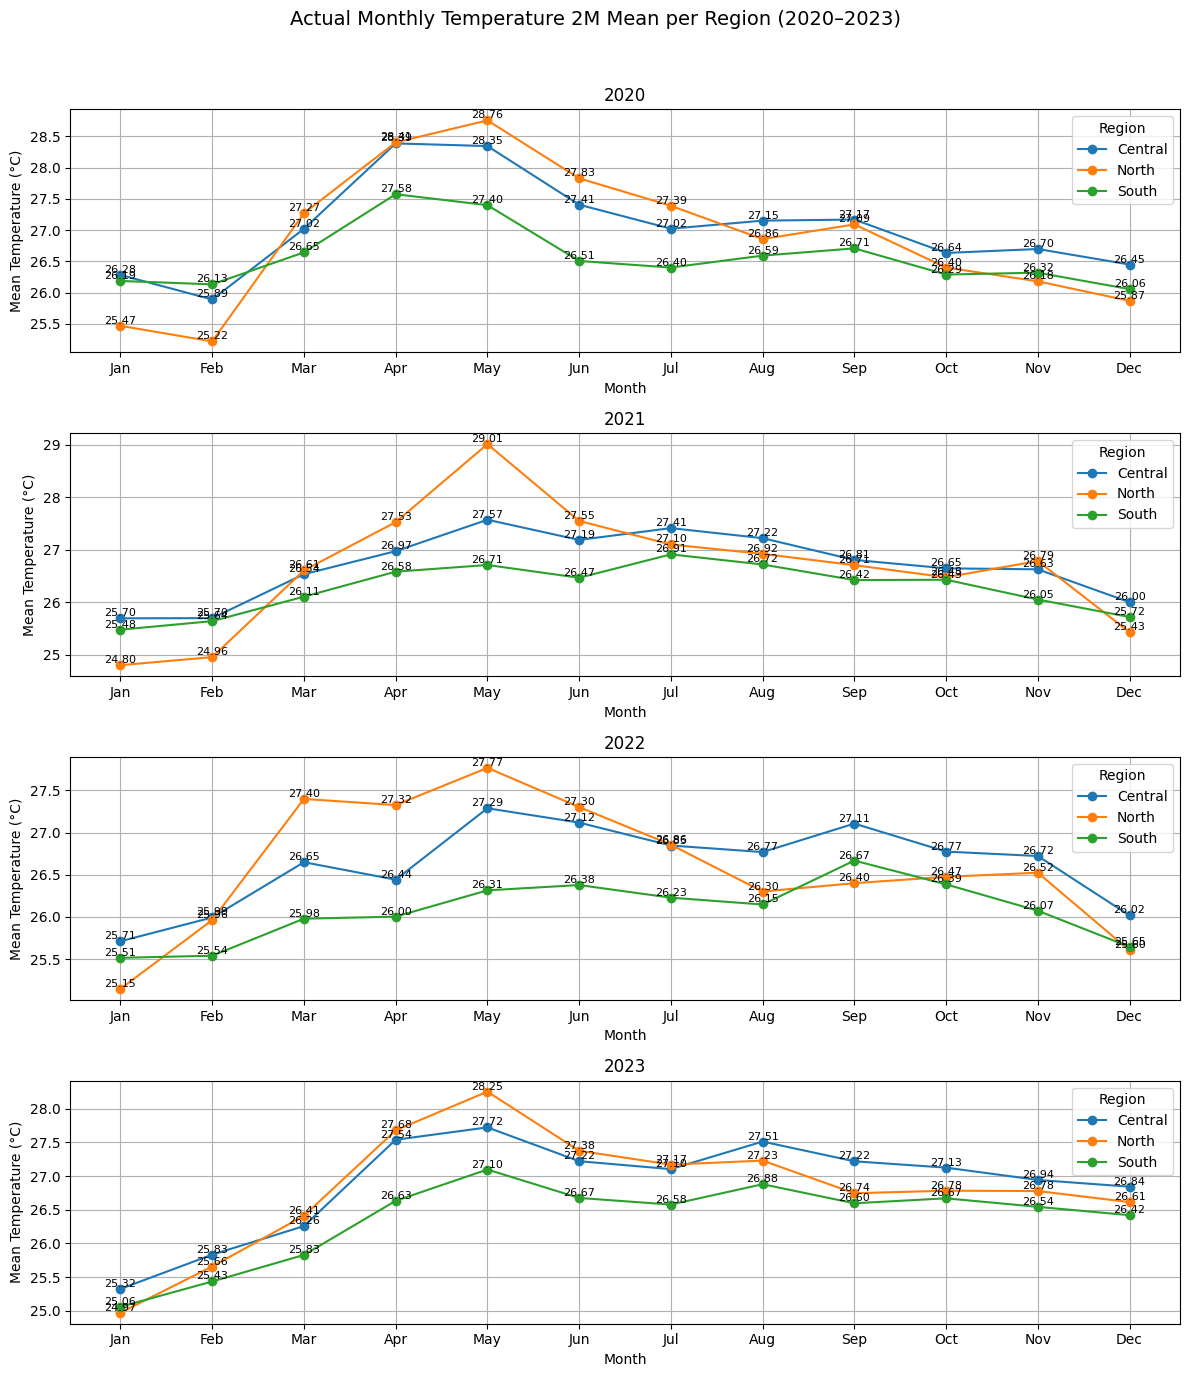

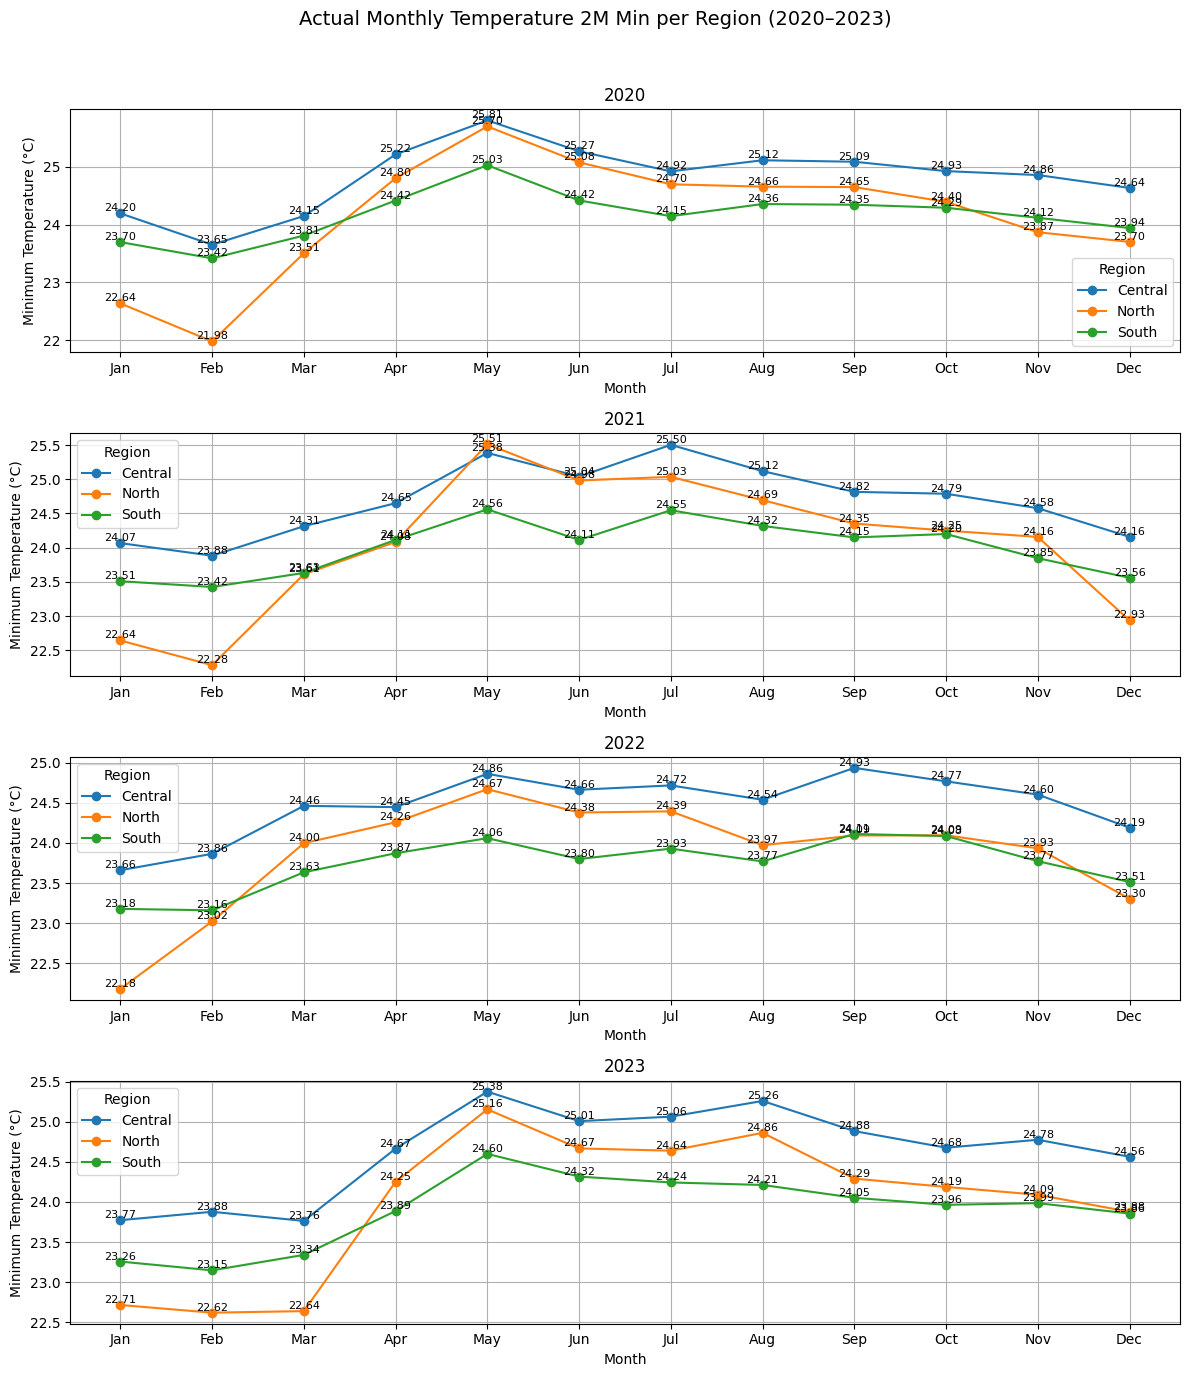

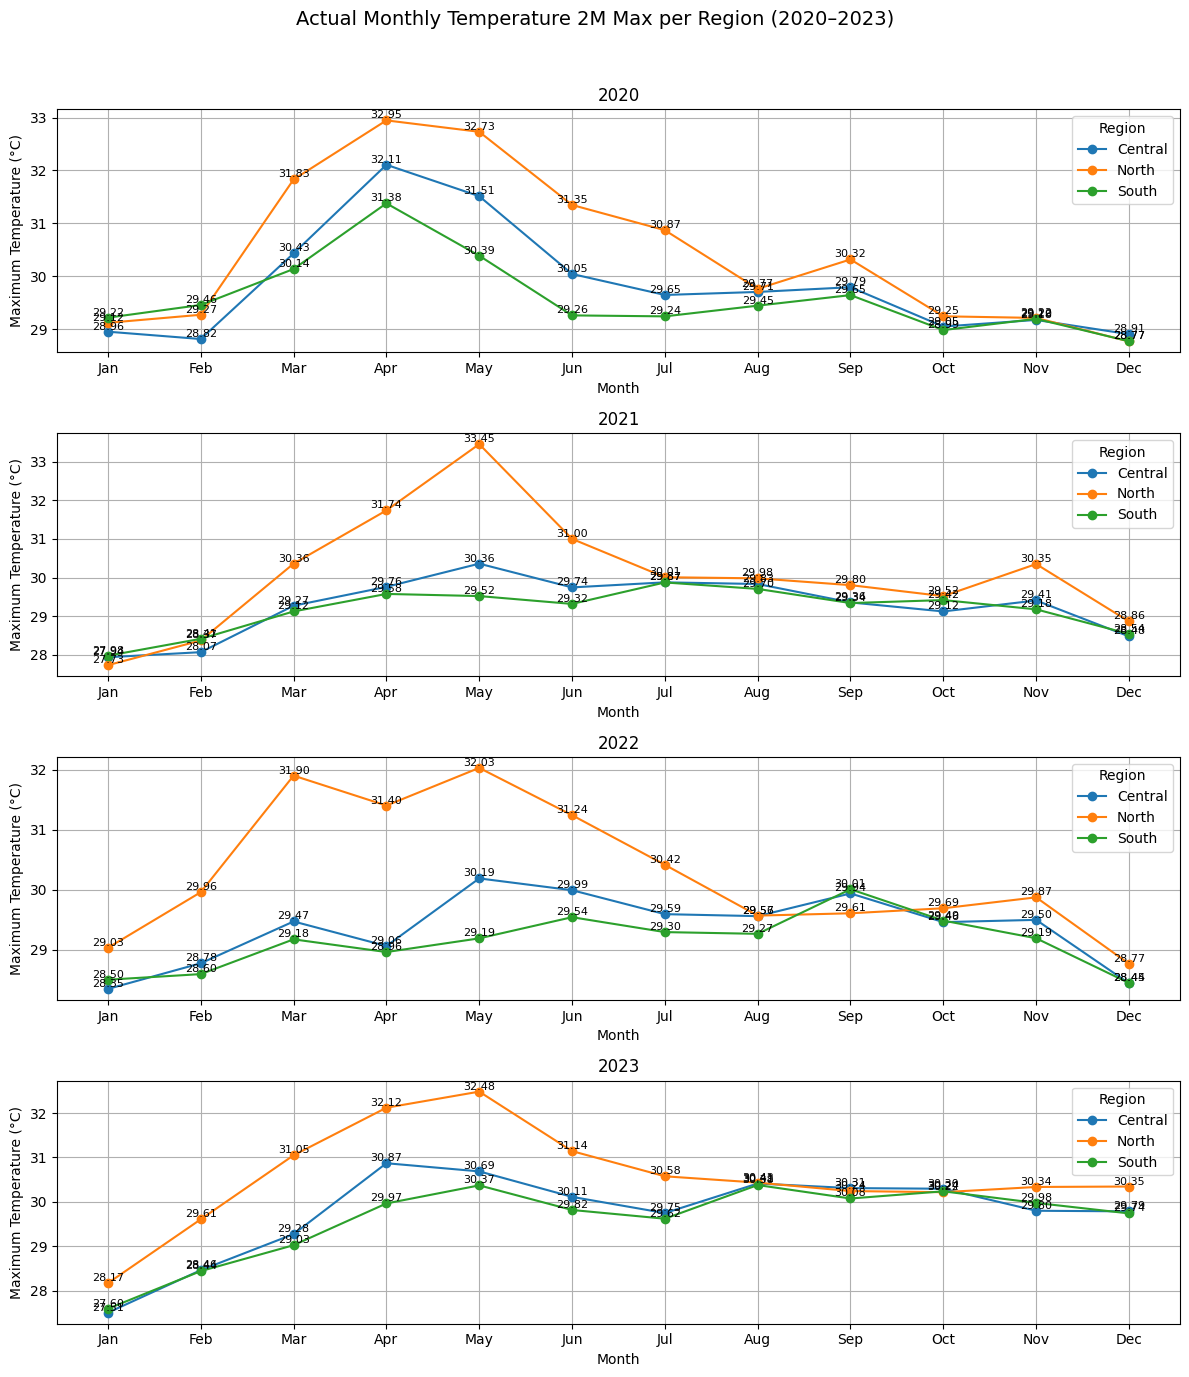

PDF saved to: actual_monthly_temperature_2020_2023.pdf


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# ============================================================
# ACTUAL MONTHLY TEMPERATURE (MEAN / MIN / MAX)
# STACKED BY YEAR, LINE PER REGION
# ============================================================

df = data_transformed.copy()

df["date"] = pd.to_datetime(df["sunrise"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

years = [2020, 2021, 2022, 2023]
df = df[df["year"].isin(years)]

# Target configuration (URUT: mean → min → max)
target_configs = [
    ("temperature_2m_mean", "Mean Temperature (°C)"),
    ("temperature_2m_min",  "Minimum Temperature (°C)"),
    ("temperature_2m_max",  "Maximum Temperature (°C)")
]

pdf_path = "actual_monthly_temperature_2020_2023.pdf"

with PdfPages(pdf_path) as pdf:

    for target_col, y_label in target_configs:

        monthly_actual = (
            df
            .groupby(["year", "region", "month"])[target_col]
            .mean()
            .reset_index()
        )

        monthly_actual["month_name"] = pd.to_datetime(
            monthly_actual["month"], format="%m"
        ).dt.strftime("%b")

        fig, axes = plt.subplots(
            nrows=len(years),
            ncols=1,
            figsize=(12, 14),
            sharex=False
        )

        for ax, year in zip(axes, years):
            data_year = monthly_actual[monthly_actual["year"] == year]

            for region in data_year["region"].unique():
                data_region = data_year[data_year["region"] == region]

                ax.plot(
                    data_region["month_name"],
                    data_region[target_col],
                    marker="o",
                    label=region
                )

                for i, val in enumerate(data_region[target_col]):
                    ax.text(
                        i,
                        val,
                        f"{val:.2f}",
                        fontsize=8,
                        ha="center",
                        va="bottom"
                    )

            ax.set_xticks(range(len(data_region["month_name"])))
            ax.set_xticklabels(data_region["month_name"])
            ax.set_xlabel("Month")

            ax.set_title(str(year))
            ax.set_ylabel(y_label)
            ax.grid(True)
            ax.legend(title="Region")

        plt.suptitle(
            f"Actual Monthly {target_col.replace('_', ' ').title()} per Region (2020–2023)",
            fontsize=14
        )

        plt.tight_layout(rect=[0, 0, 1, 0.96])

        # 🔥 SAVE KE PDF
        pdf.savefig(fig)

        # 🔥 TAMPIL DI NOTEBOOK
        plt.show()

        # 🔥 BERSIHIN MEMORY
        plt.close(fig)

print(f"PDF saved to: {pdf_path}")


- save to pdf

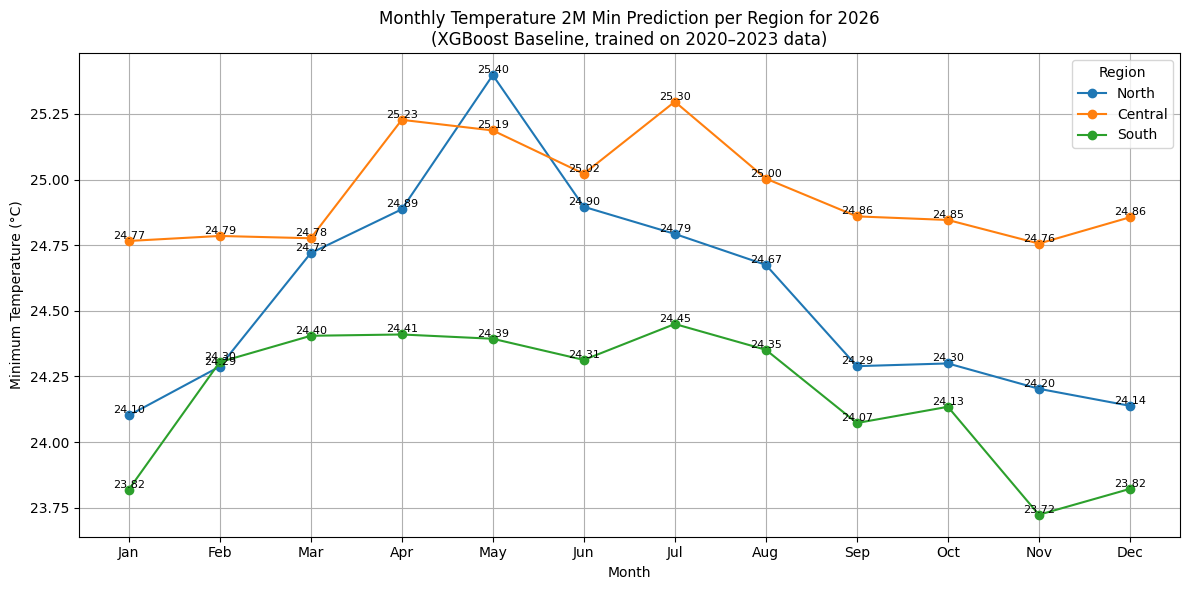

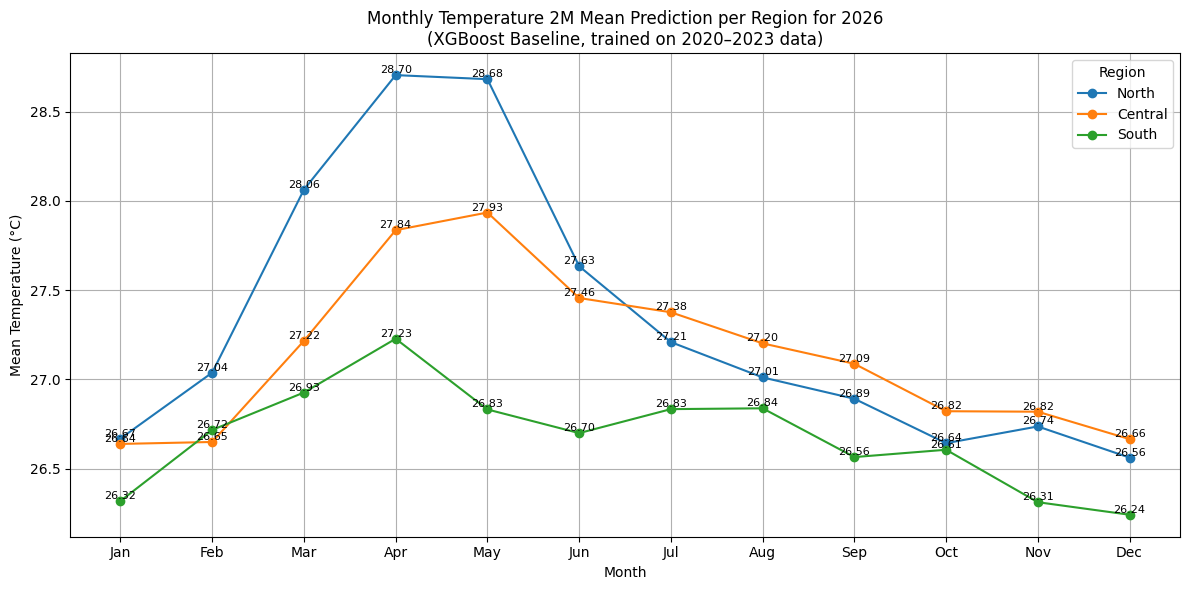

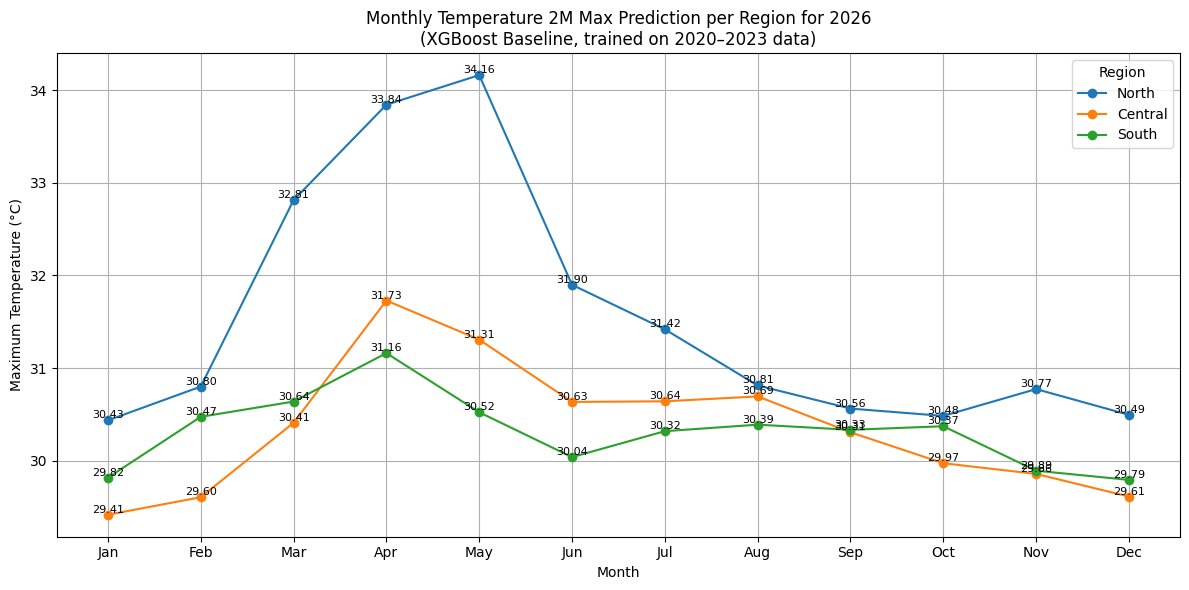

PDF saved to: predicted_monthly_temperature_2026.pdf


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# ============================================================
# MONTHLY PREDICTION PER REGION (XGBOOST BASELINE)
# MULTI-OUTPUT — SHOW + SAVE PDF
# ============================================================

df = data_transformed.copy()
df["month"] = pd.to_datetime(df["sunrise"]).dt.month

regions = df["region"].unique()

# Target setup: index → name → label
targets = {
    0: ("temperature_2m_min",  "Minimum Temperature (°C)"),
    1: ("temperature_2m_mean", "Mean Temperature (°C)"),
    2: ("temperature_2m_max",  "Maximum Temperature (°C)")
}

pdf_path = "predicted_monthly_temperature_2026.pdf"

with PdfPages(pdf_path) as pdf:

    # ========================================================
    # LOOP PER TARGET (MIN / MEAN / MAX)
    # ========================================================

    for target_idx, (target_name, y_label) in targets.items():

        fig = plt.figure(figsize=(12, 6))

        for region in regions:
            # 1. Filter region
            df_region = df[df["region"] == region]

            # 2. Monthly aggregation (FEATURE SIDE)
            monthly_features = (
                df_region
                .groupby("month")
                .mean(numeric_only=True)
                .reset_index()
            )

            # 3. One-hot encoding region
            for col in [c for c in X_train.columns if c.startswith("region_")]:
                monthly_features[col] = 0
            monthly_features[f"region_{region}"] = 1

            # 4. Align feature order
            X_monthly = monthly_features[X_train.columns]

            # 5. Predict (MULTI-OUTPUT → AMBIL 1 TARGET)
            preds = xgb_model.predict(X_monthly)
            monthly_features["prediction"] = preds[:, target_idx]

            # 6. Month name
            month_name = pd.to_datetime(
                monthly_features["month"], format="%m"
            ).dt.strftime("%b")

            # 7. Plot
            plt.plot(
                month_name,
                monthly_features["prediction"],
                marker="o",
                label=region
            )

            # Value labels
            for i, val in enumerate(monthly_features["prediction"]):
                plt.text(
                    i,
                    val,
                    f"{val:.2f}",
                    fontsize=8,
                    ha="center",
                    va="bottom"
                )

        # ====================================================
        # FIGURE STYLING
        # ====================================================

        plt.title(
            f"Monthly {target_name.replace('_', ' ').title()} Prediction per Region for 2026\n"
            "(XGBoost Baseline, trained on 2020–2023 data)"
        )
        plt.xlabel("Month")
        plt.ylabel(y_label)
        plt.legend(title="Region")
        plt.grid(True)
        plt.tight_layout()

        # 🔥 SAVE KE PDF
        pdf.savefig(fig)

        # 🔥 TAMPIL DI NOTEBOOK
        plt.show()

        # 🔥 BERSIHIN MEMORY
        plt.close(fig)

print(f"PDF saved to: {pdf_path}")


In [ ]:
from PyPDF2 import PdfMerger

merger = PdfMerger()
merger.append("predicted_monthly_temperature_2026.pdf")
merger.append("actual_monthly_temperature_2020_2023.pdf")

merger.write("temperature_actual_vs_prediction.pdf")
merger.close()
